<a href="https://colab.research.google.com/github/faezeshrf/MNE_Signal-Processing/blob/main/Untitled22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip -q install mne mne-bids numpy pandas


In [ ]:

!pip -q install openneuro-py


!mkdir -p /content/data/ds003810


!openneuro-py download \
  --dataset=ds003810 \
  --include=sub-02 \
  --include=sub-03 \
  --include=sub-04 \
  --include=sub-05 \
  --include=sub-06 \
  --target-dir=/content/data/ds003810


👋 Hello! This is openneuro-py 2025.1.0. Great to see you! 🤗

   👉 Please report problems 🤯 and bugs 🪲 at
      https://github.com/hoechenberger/openneuro-py/issues

🌍 Preparing to download ds003810 …
📁 Traversing directories for ds003810 : 24 entities [00:02,  9.13 entities/s]
📥 Retrieving up to 20 files (5 concurrent downloads). 
✅ Finished downloading ds003810.
 
🧠 Please enjoy your brains.
 


In [ ]:
!openneuro-py download \
  --dataset=ds003810 \
  --include=sub-05 \
  --target-dir=/content/data/ds003810


👋 Hello! This is openneuro-py 2025.1.0. Great to see you! 🤗

   👉 Please report problems 🤯 and bugs 🪲 at
      https://github.com/hoechenberger/openneuro-py/issues

🌍 Preparing to download ds003810 …
📁 Traversing directories for ds003810 : 24 entities [00:01, 17.80 entities/s]
📥 Retrieving up to 20 files (5 concurrent downloads). 
✅ Finished downloading ds003810.
 
🧠 Please enjoy your brains.
 


In [ ]:
!openneuro-py download \
  --dataset=ds003810 \
  --include=sub-04\
   --target-dir=/content/data/ds003810


👋 Hello! This is openneuro-py 2025.1.0. Great to see you! 🤗

   👉 Please report problems 🤯 and bugs 🪲 at
      https://github.com/hoechenberger/openneuro-py/issues

🌍 Preparing to download ds003810 …
📁 Traversing directories for ds003810 : 24 entities [00:01, 17.73 entities/s]
📥 Retrieving up to 20 files (5 concurrent downloads). 
✅ Finished downloading ds003810.
 
🧠 Please enjoy your brains.
 


In [ ]:
!openneuro-py download \
  --dataset=ds003810 \
  --include=sub-03 \
   --target-dir=/content/data/ds003810


👋 Hello! This is openneuro-py 2025.1.0. Great to see you! 🤗

   👉 Please report problems 🤯 and bugs 🪲 at
      https://github.com/hoechenberger/openneuro-py/issues

🌍 Preparing to download ds003810 …
📁 Traversing directories for ds003810 : 24 entities [00:01, 18.23 entities/s]
📥 Retrieving up to 20 files (5 concurrent downloads). 
Re-downloading sub-03_task-MIvsRest_run-0_channels.tsv: file size mismatch.: 0.00B [00:00, ?B/s]
                                                                                                
                                                                                                ✅ Finished downloading ds003810.
 
🧠 Please enjoy your brains.
 


In [ ]:
!openneuro-py download \
  --dataset=ds003810 \
  --include=sub-02 \
   --target-dir=/content/data/ds003810


👋 Hello! This is openneuro-py 2025.1.0. Great to see you! 🤗

   👉 Please report problems 🤯 and bugs 🪲 at
      https://github.com/hoechenberger/openneuro-py/issues

🌍 Preparing to download ds003810 …
📁 Traversing directories for ds003810 : 24 entities [00:01, 18.67 entities/s]
📥 Retrieving up to 20 files (5 concurrent downloads). 
Re-downloading sub-02_task-MIvsRest_run-1_channels.tsv: file size mismatch.: 0.00B [00:00, ?B/s]
Re-downloading sub-02_task-MIvsRest_run-2_channels.tsv: file size mismatch.: 0.00B [00:00, ?B/s]

                                                                                                
                                                                                                

✅ Finished downloading ds003810.
 
🧠 Please enjoy your brains.
 


In [ ]:
import os, glob, textwrap, json, pandas as pd
base = "/content/data/ds003810"
print("Root exists:", os.path.exists(base))

# list first-level subject folders
print(sorted([d for d in os.listdir(base) if d.startswith("sub-")])[:8])

# peek participants.tsv if present
ptsv = glob.glob(base + "/*/participants.tsv")
print("participants.tsv:", ptsv[0] if ptsv else "not found")
if ptsv:
    print(pd.read_csv(ptsv[0], sep="\t").head())

Root exists: True
['sub-02', 'sub-03', 'sub-04', 'sub-05', 'sub-06']
participants.tsv: not found


In [ ]:
from pathlib import Path
import numpy as np, glob
import mne
from mne_bids import BIDSPath, read_raw_bids, get_entities_from_fname

bids_root = Path("/content/data/ds003810")

def load_raw_auto_fix_units(eeg_file: str):
    """Load raw from a BIDS EEG file. If amplitudes look like microvolts stored as volts,
    convert EEG channels µV -> V exactly once (no info flags needed)."""
    ents = get_entities_from_fname(eeg_file)
    bids_path = BIDSPath(subject=ents.get("subject"),
                         session=ents.get("session"),
                         task=ents.get("task"),
                         run=ents.get("run"),
                         datatype="eeg",
                         root=bids_root)
    raw = read_raw_bids(bids_path=bids_path, verbose=False)
    raw.load_data()

    # Decide if unit-fix is needed (check mean peak-to-peak over EEG in volts)
    picks_eeg = mne.pick_types(raw.info, eeg=True, stim=False, eog=False, ecg=False, emg=False, misc=False)
    x = raw.get_data(picks=picks_eeg)  # interpreted as volts by MNE
    p2p_v = np.ptp(x, axis=1).mean()

    # If absurdly large (> ~1 V), it's almost surely µV stored as V -> fix once
    if p2p_v > 1.0:
        raw.apply_function(lambda d: d * 1e-6, picks=picks_eeg)  # µV -> V

    return raw

Reading 0 ... 15749  =      0.000 ...   125.992 secs...


/tmp/ipython-input-1284032797.py:18: RuntimeWarning: Did not find any events.tsv associated with sub-04_task-MIvsRest_run-0.

The search_str was "/content/data/ds003810/sub-04/**/eeg/sub-04*events.tsv"
  raw = read_raw_bids(bids_path=bp, verbose=False); raw.load_data()
/tmp/ipython-input-1284032797.py:18: RuntimeWarning: Unable to map the following column(s) to to MNE:
gender: M
dominant hand: R
  raw = read_raw_bids(bids_path=bp, verbose=False); raw.load_data()


RAW (viewer DC removed) ...


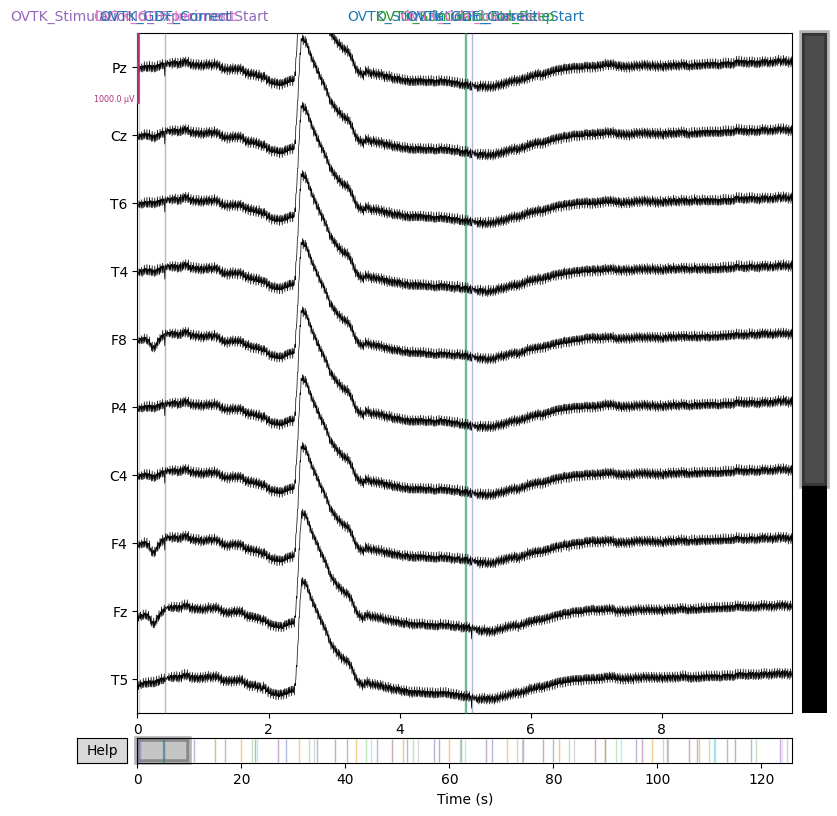

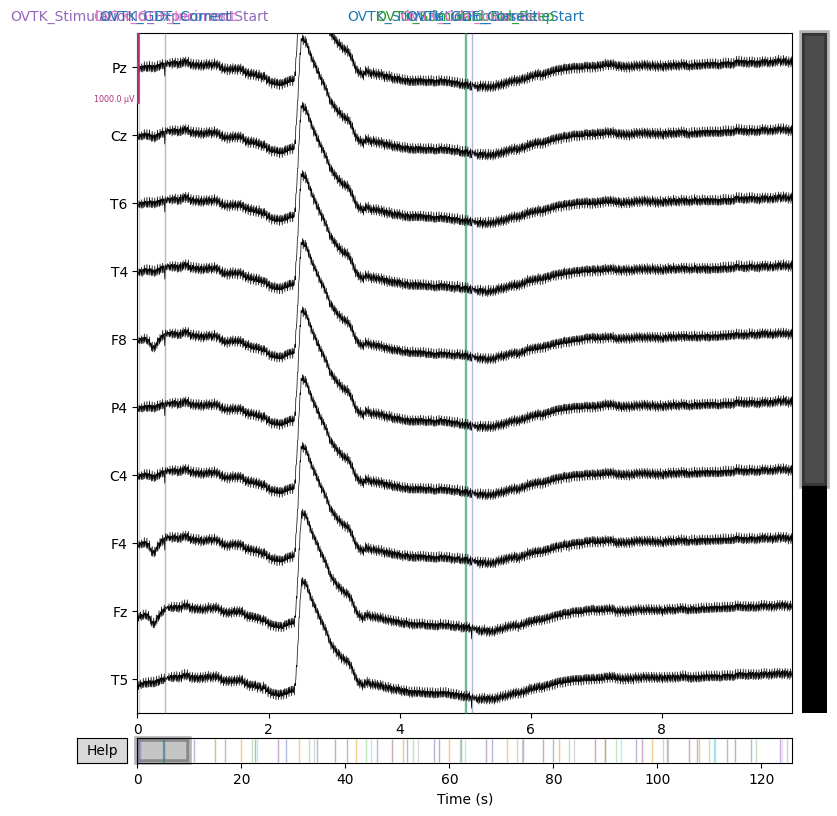

In [104]:

from pathlib import Path
import numpy as np, glob, mne
from mne_bids import BIDSPath, read_raw_bids, get_entities_from_fname

bids_root = Path("/content/data/ds003810")

def find_first_eeg(subj):
    cands = []
    for ext in (".edf", ".vhdr", ".set"):
        cands += glob.glob(str(bids_root / f"sub-{subj}" / "**" / "eeg" / f"*{ext}"), recursive=True)
    return sorted(cands)[0] if cands else None

def load_raw_auto_fix_units(eeg_file):
    ents = get_entities_from_fname(eeg_file)
    bp = BIDSPath(subject=ents.get("subject"), session=ents.get("session"),
                  task=ents.get("task"), run=ents.get("run"),
                  datatype="eeg", root=bids_root)
    raw = read_raw_bids(bids_path=bp, verbose=False); raw.load_data()
    picks = mne.pick_types(raw.info, eeg=True, stim=False, eog=False, ecg=False, emg=False, misc=False)
    x = raw.get_data(picks=picks)
    if np.ptp(x, axis=1).mean() > 1.0:                # looks like µV interpreted as V
        raw.apply_function(lambda d: d * 1e-6, picks=picks)  # µV -> V
    return raw

subj = "04"  # <- sub-04
eeg_file = find_first_eeg(subj)
assert eeg_file, "No EEG file"

raw = load_raw_auto_fix_units(eeg_file)
picks_eeg = mne.pick_types(raw.info, eeg=True)

# 1) RAW quick look but remove DC in the viewer (does NOT change data)
print("RAW (viewer DC removed) ...")
raw.plot(picks='eeg', n_channels=10, duration=10,
         scalings=dict(eeg=500e-6), remove_dc=True)  # 500 µV/div; raise/lower if needed

Setting up band-pass filter from 1 - 40 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 40.00 Hz: -6.02, -6.02 dB



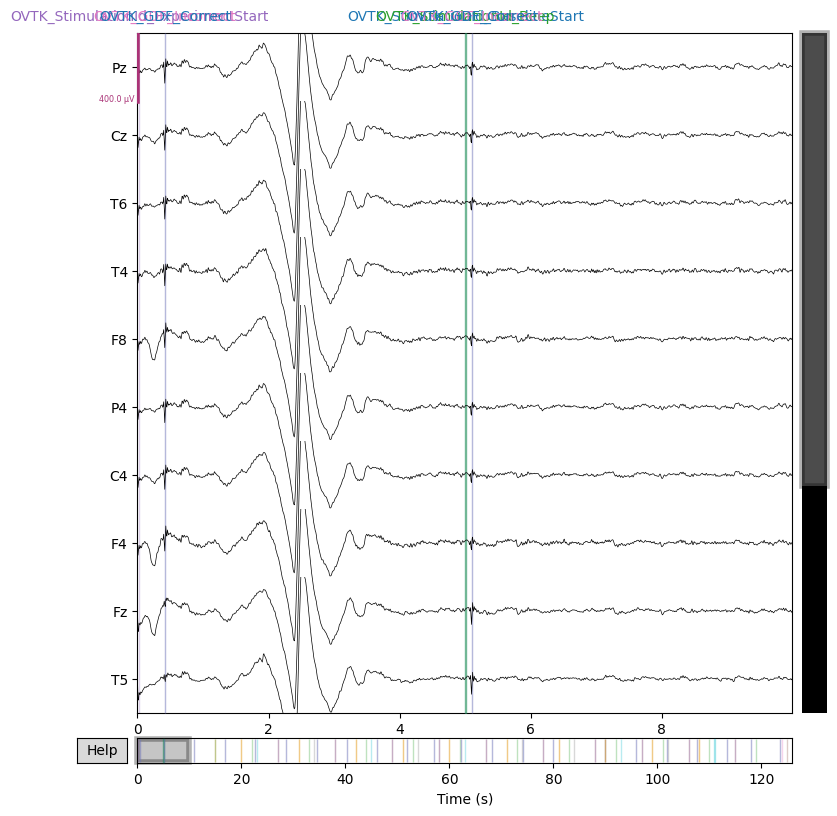

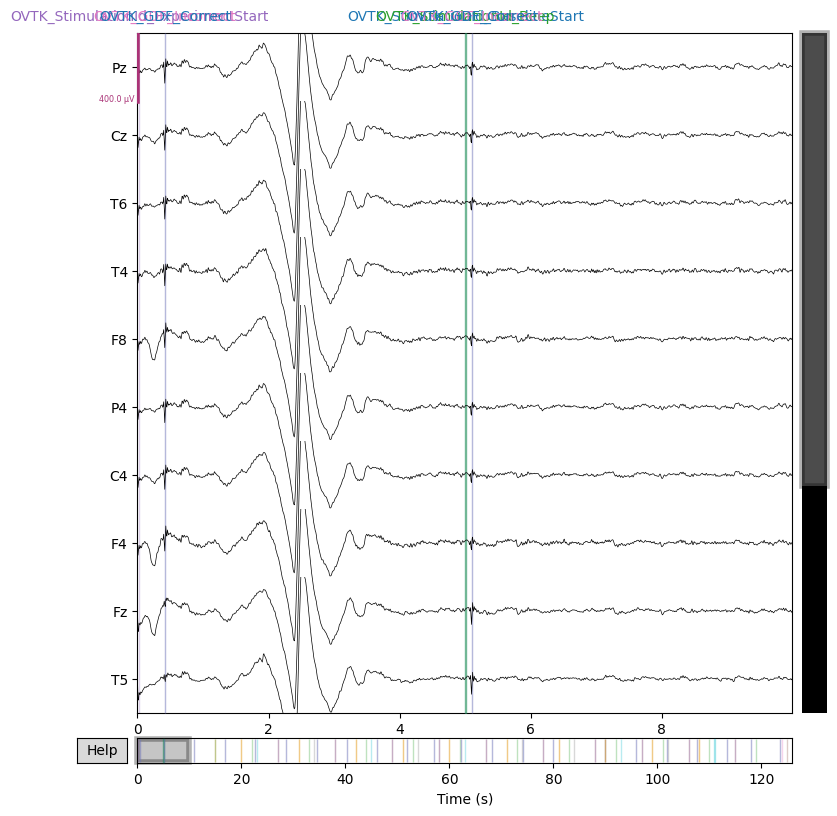

In [106]:
# RAW viewer with inline filters (does NOT modify data on disk)
raw.plot(
    picks='eeg',
    n_channels=10, duration=10,
    scalings=dict(eeg=200e-6),
    remove_dc=True,              # remove window DC
    highpass=1.0,                # kill drift
    lowpass=40.0                 # keep EEG band
)


=== (A) RAW with ADAPTIVE scale per subject ===
Reading 0 ... 15624  =      0.000 ...   124.992 secs...
sub-02: mean p2p ≈ 178 µV -> adaptive scale 107 µV/div


/tmp/ipython-input-2956220998.py:22: RuntimeWarning: Did not find any events.tsv associated with sub-02_task-MIvsRest_run-0.

The search_str was "/content/data/ds003810/sub-02/**/eeg/sub-02*events.tsv"
  raw = read_raw_bids(bids_path=bp, verbose=False); raw.load_data()
/tmp/ipython-input-2956220998.py:22: RuntimeWarning: Unable to map the following column(s) to to MNE:
gender: M
dominant hand: R
  raw = read_raw_bids(bids_path=bp, verbose=False); raw.load_data()


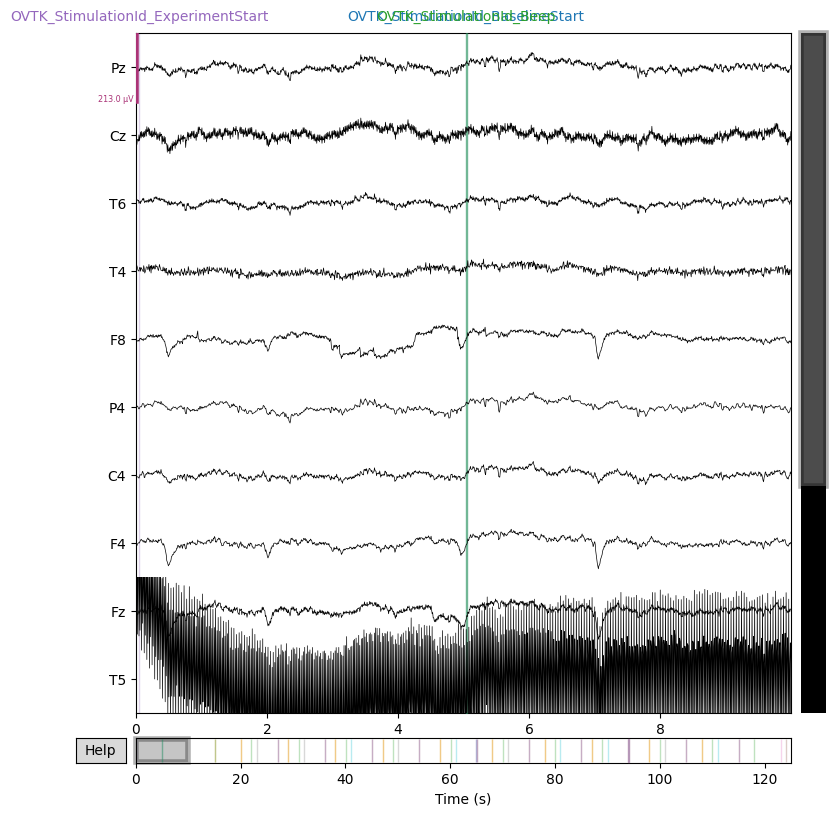

Reading 0 ... 15999  =      0.000 ...   127.992 secs...


/tmp/ipython-input-2956220998.py:22: RuntimeWarning: Did not find any events.tsv associated with sub-03_task-MIvsRest_run-0.

The search_str was "/content/data/ds003810/sub-03/**/eeg/sub-03*events.tsv"
  raw = read_raw_bids(bids_path=bp, verbose=False); raw.load_data()
/tmp/ipython-input-2956220998.py:22: RuntimeWarning: Unable to map the following column(s) to to MNE:
gender: F
dominant hand: R
  raw = read_raw_bids(bids_path=bp, verbose=False); raw.load_data()


sub-03: mean p2p ≈ 540 µV -> adaptive scale 324 µV/div


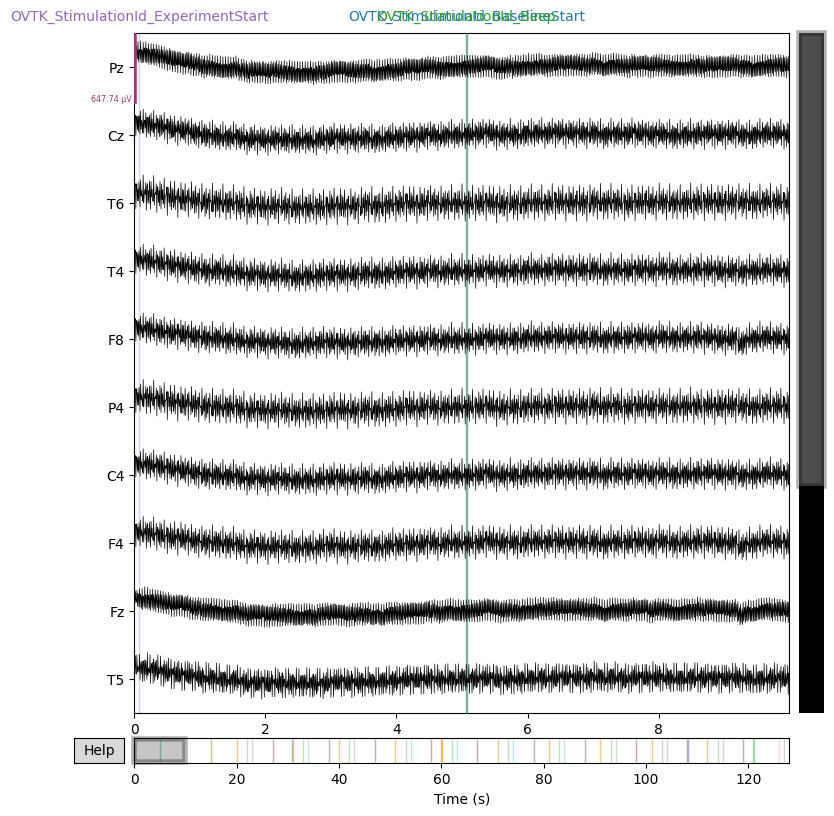

Reading 0 ... 15749  =      0.000 ...   125.992 secs...


/tmp/ipython-input-2956220998.py:22: RuntimeWarning: Did not find any events.tsv associated with sub-04_task-MIvsRest_run-0.

The search_str was "/content/data/ds003810/sub-04/**/eeg/sub-04*events.tsv"
  raw = read_raw_bids(bids_path=bp, verbose=False); raw.load_data()
/tmp/ipython-input-2956220998.py:22: RuntimeWarning: Unable to map the following column(s) to to MNE:
gender: M
dominant hand: R
  raw = read_raw_bids(bids_path=bp, verbose=False); raw.load_data()


sub-04: mean p2p ≈ 3081 µV -> adaptive scale 1000 µV/div


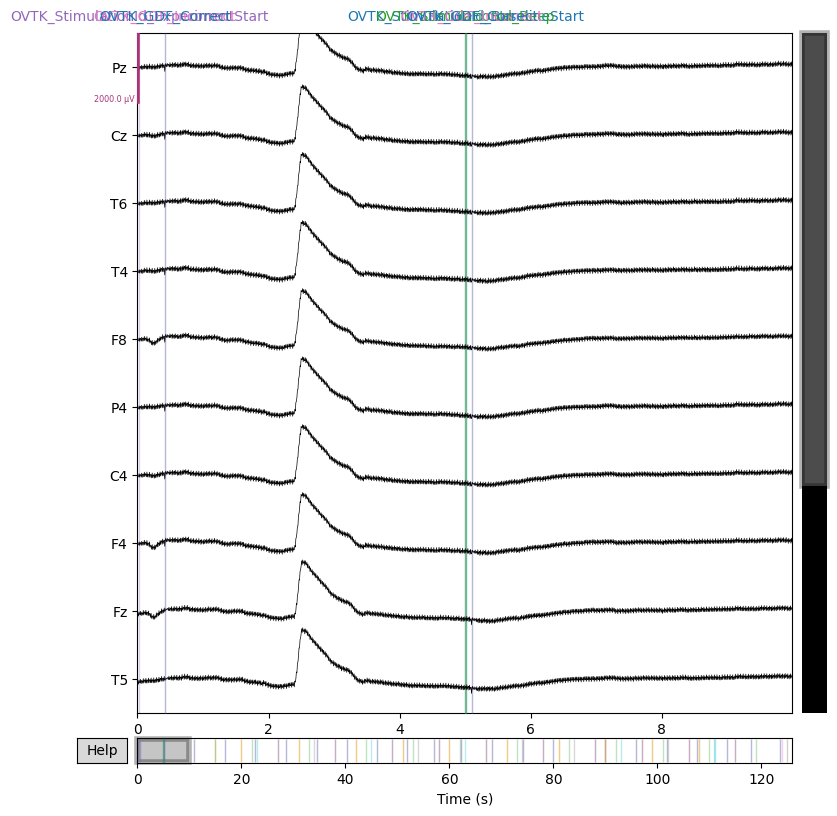

Reading 0 ... 15749  =      0.000 ...   125.992 secs...


/tmp/ipython-input-2956220998.py:22: RuntimeWarning: Did not find any events.tsv associated with sub-05_task-MIvsRest_run-0.

The search_str was "/content/data/ds003810/sub-05/**/eeg/sub-05*events.tsv"
  raw = read_raw_bids(bids_path=bp, verbose=False); raw.load_data()
/tmp/ipython-input-2956220998.py:22: RuntimeWarning: Unable to map the following column(s) to to MNE:
gender: M
dominant hand: R
  raw = read_raw_bids(bids_path=bp, verbose=False); raw.load_data()


sub-05: mean p2p ≈ 360 µV -> adaptive scale 216 µV/div


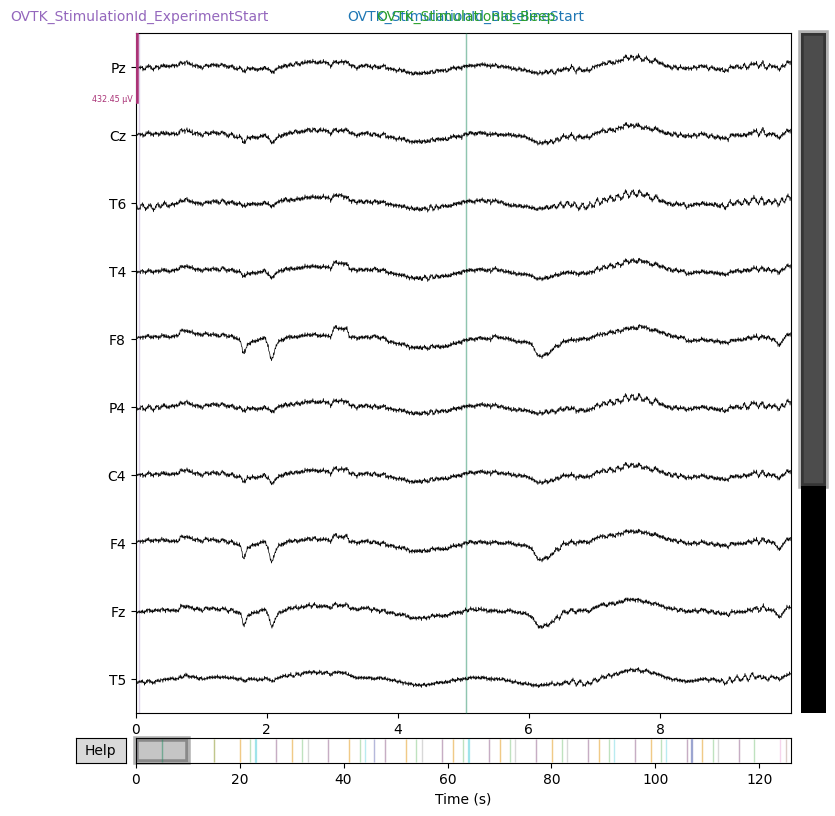

Reading 0 ... 15624  =      0.000 ...   124.992 secs...


/tmp/ipython-input-2956220998.py:22: RuntimeWarning: Did not find any events.tsv associated with sub-06_task-MIvsRest_run-0.

The search_str was "/content/data/ds003810/sub-06/**/eeg/sub-06*events.tsv"
  raw = read_raw_bids(bids_path=bp, verbose=False); raw.load_data()
/tmp/ipython-input-2956220998.py:22: RuntimeWarning: Unable to map the following column(s) to to MNE:
gender: M
dominant hand: R
  raw = read_raw_bids(bids_path=bp, verbose=False); raw.load_data()


sub-06: mean p2p ≈ 611 µV -> adaptive scale 367 µV/div


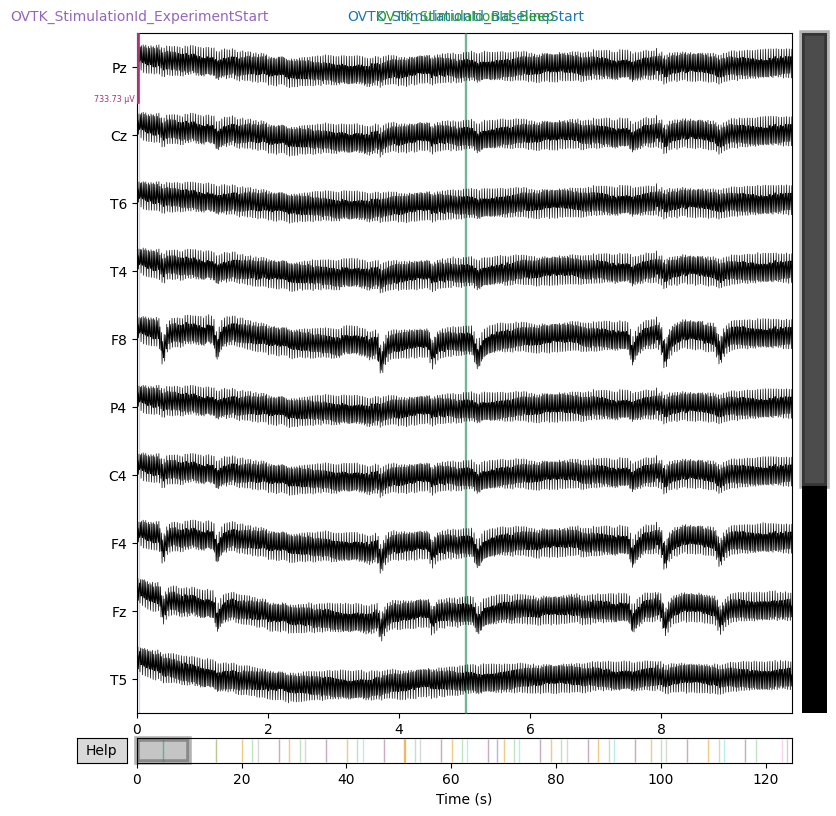

In [102]:
 # RAW plots for sub-02..sub-06: (A) adaptive scale per subject, (B) fixed scale for all
from pathlib import Path
import glob, numpy as np, mne
from mne_bids import BIDSPath, read_raw_bids, get_entities_from_fname

# ---------- Setup ----------
bids_root = Path("/content/data/ds003810")
subjects = [f"{i:02d}" for i in range(2, 7)]  # 02..06
FIXED_SCALE = 100e-6  # 100 µV/div (use 50e-6 or 200e-6 if you prefer)

def find_first_eeg(subj: str):
    cands = []
    for ext in (".edf", ".vhdr", ".set"):
        cands += glob.glob(str(bids_root / f"sub-{subj}" / "**" / "eeg" / f"*{ext}"), recursive=True)
    return sorted(cands)[0] if cands else None

def load_raw_auto_fix_units(eeg_file: str):
    ents = get_entities_from_fname(eeg_file)
    bp = BIDSPath(subject=ents.get("subject"), session=ents.get("session"),
                  task=ents.get("task"), run=ents.get("run"),
                  datatype="eeg", root=bids_root)
    raw = read_raw_bids(bids_path=bp, verbose=False); raw.load_data()
    picks = mne.pick_types(raw.info, eeg=True, stim=False, eog=False, ecg=False, emg=False, misc=False)
    x = raw.get_data(picks=picks)
    if np.ptp(x, axis=1).mean() > 1.0:  # looks like µV interpreted as V
        raw.apply_function(lambda d: d * 1e-6, picks=picks)  # µV -> V (apply once)
    return raw

# ---------- (A) Adaptive scale per subject ----------
print("=== (A) RAW with ADAPTIVE scale per subject ===")
for subj in subjects:
    eeg_file = find_first_eeg(subj)
    if not eeg_file:
        print(f"[sub-{subj}] no EEG file found — skip");
        continue

    raw = load_raw_auto_fix_units(eeg_file)
    picks = mne.pick_types(raw.info, eeg=True)
    p2p_uv = np.ptp(raw.get_data(picks=picks), axis=1).mean() * 1e6

    # choose display scale from p2p (in Volts), bounded to a sensible range
    scale = float(np.clip(0.6 * p2p_uv * 1e-6, 50e-6, 1000e-6))
    print(f"sub-{subj}: mean p2p ≈ {p2p_uv:.0f} µV -> adaptive scale {scale*1e6:.0f} µV/div")

    raw.plot(picks='eeg', n_channels=10, duration=10, scalings=dict(eeg=scale))









=== (B) RAW with FIXED scale for all subjects ===
Reading 0 ... 15624  =      0.000 ...   124.992 secs...
sub-02: mean p2p ≈ 178 µV | plotting with FIXED 100 µV/div


/tmp/ipython-input-2956220998.py:22: RuntimeWarning: Did not find any events.tsv associated with sub-02_task-MIvsRest_run-0.

The search_str was "/content/data/ds003810/sub-02/**/eeg/sub-02*events.tsv"
  raw = read_raw_bids(bids_path=bp, verbose=False); raw.load_data()
/tmp/ipython-input-2956220998.py:22: RuntimeWarning: Unable to map the following column(s) to to MNE:
gender: M
dominant hand: R
  raw = read_raw_bids(bids_path=bp, verbose=False); raw.load_data()


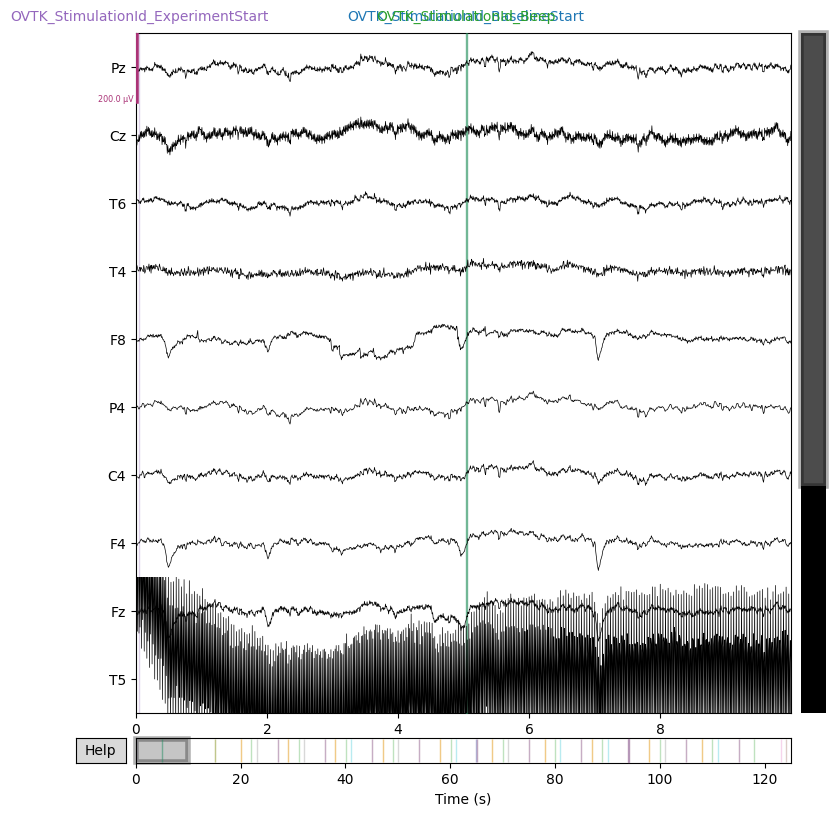

Reading 0 ... 15999  =      0.000 ...   127.992 secs...


/tmp/ipython-input-2956220998.py:22: RuntimeWarning: Did not find any events.tsv associated with sub-03_task-MIvsRest_run-0.

The search_str was "/content/data/ds003810/sub-03/**/eeg/sub-03*events.tsv"
  raw = read_raw_bids(bids_path=bp, verbose=False); raw.load_data()
/tmp/ipython-input-2956220998.py:22: RuntimeWarning: Unable to map the following column(s) to to MNE:
gender: F
dominant hand: R
  raw = read_raw_bids(bids_path=bp, verbose=False); raw.load_data()


sub-03: mean p2p ≈ 540 µV | plotting with FIXED 100 µV/div


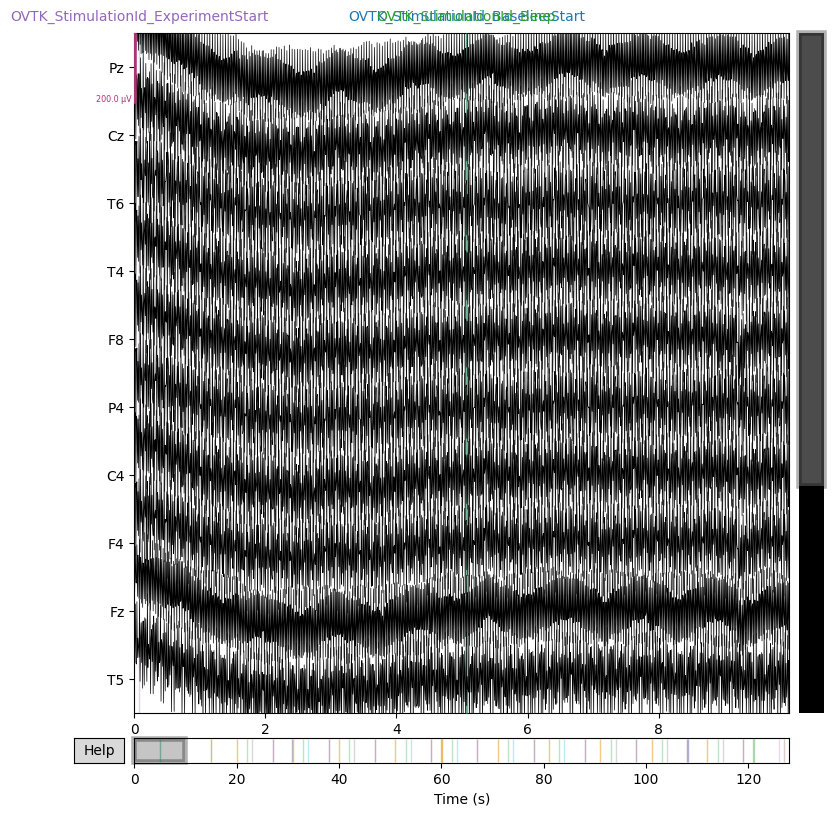

Reading 0 ... 15749  =      0.000 ...   125.992 secs...


/tmp/ipython-input-2956220998.py:22: RuntimeWarning: Did not find any events.tsv associated with sub-04_task-MIvsRest_run-0.

The search_str was "/content/data/ds003810/sub-04/**/eeg/sub-04*events.tsv"
  raw = read_raw_bids(bids_path=bp, verbose=False); raw.load_data()
/tmp/ipython-input-2956220998.py:22: RuntimeWarning: Unable to map the following column(s) to to MNE:
gender: M
dominant hand: R
  raw = read_raw_bids(bids_path=bp, verbose=False); raw.load_data()


sub-04: mean p2p ≈ 3081 µV | plotting with FIXED 100 µV/div


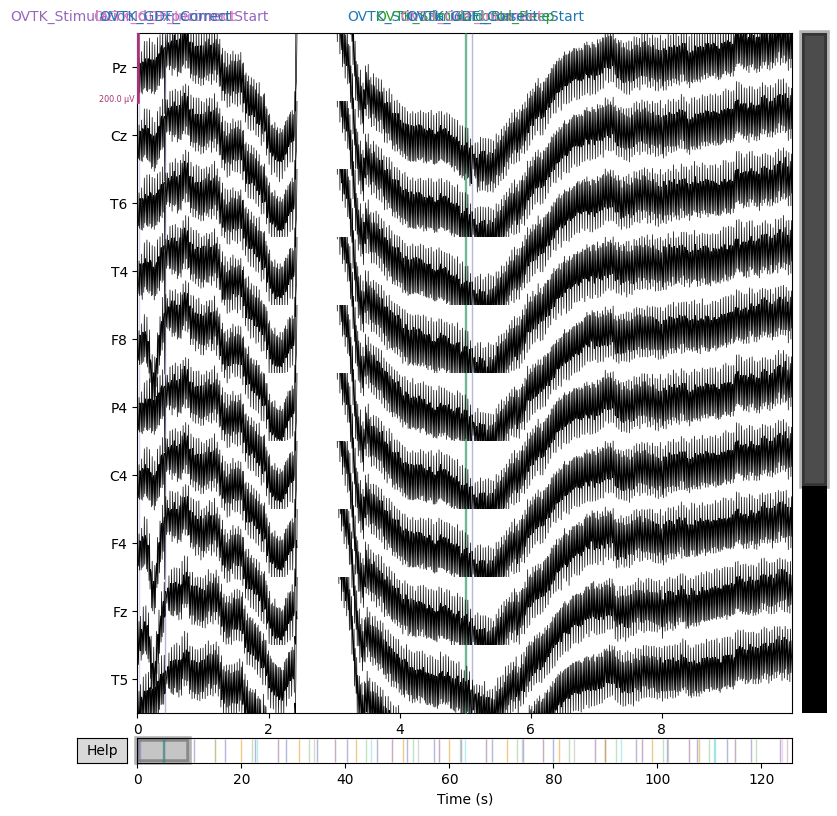

Reading 0 ... 15749  =      0.000 ...   125.992 secs...


/tmp/ipython-input-2956220998.py:22: RuntimeWarning: Did not find any events.tsv associated with sub-05_task-MIvsRest_run-0.

The search_str was "/content/data/ds003810/sub-05/**/eeg/sub-05*events.tsv"
  raw = read_raw_bids(bids_path=bp, verbose=False); raw.load_data()
/tmp/ipython-input-2956220998.py:22: RuntimeWarning: Unable to map the following column(s) to to MNE:
gender: M
dominant hand: R
  raw = read_raw_bids(bids_path=bp, verbose=False); raw.load_data()


sub-05: mean p2p ≈ 360 µV | plotting with FIXED 100 µV/div


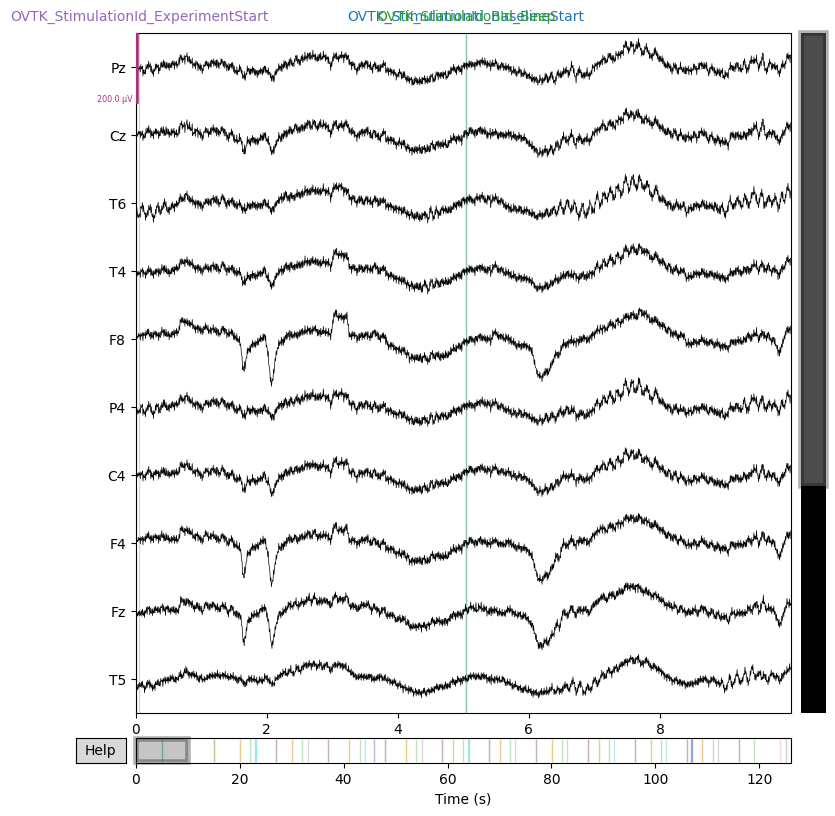

Reading 0 ... 15624  =      0.000 ...   124.992 secs...


/tmp/ipython-input-2956220998.py:22: RuntimeWarning: Did not find any events.tsv associated with sub-06_task-MIvsRest_run-0.

The search_str was "/content/data/ds003810/sub-06/**/eeg/sub-06*events.tsv"
  raw = read_raw_bids(bids_path=bp, verbose=False); raw.load_data()
/tmp/ipython-input-2956220998.py:22: RuntimeWarning: Unable to map the following column(s) to to MNE:
gender: M
dominant hand: R
  raw = read_raw_bids(bids_path=bp, verbose=False); raw.load_data()


sub-06: mean p2p ≈ 611 µV | plotting with FIXED 100 µV/div


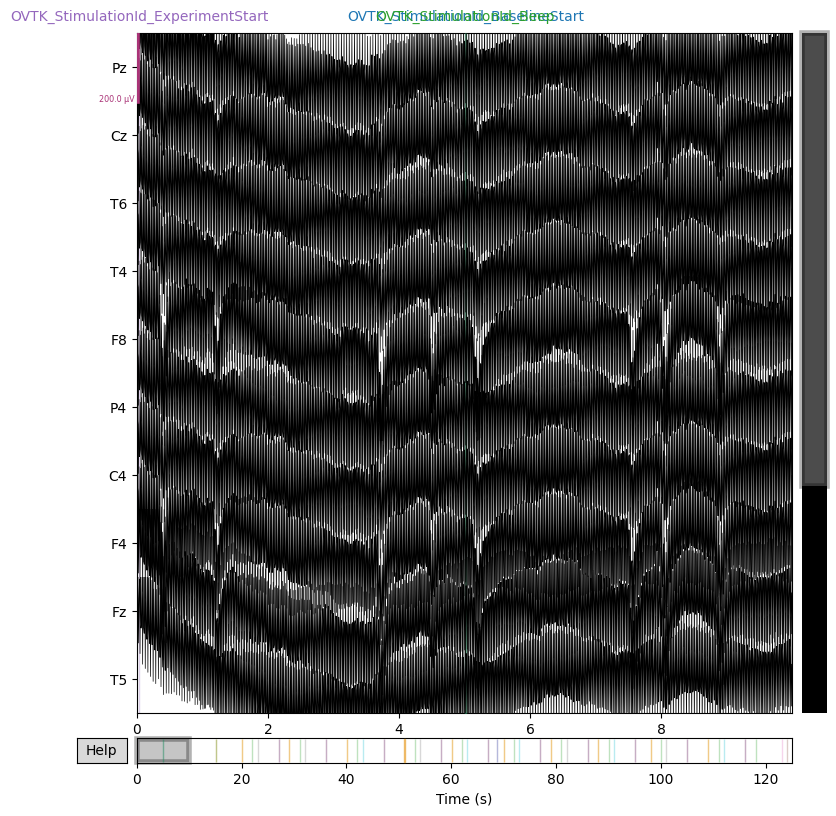

In [103]:
# ---------- (B) Fixed scale for all subjects ----------
print("\n=== (B) RAW with FIXED scale for all subjects ===")
for subj in subjects:
    eeg_file = find_first_eeg(subj)
    if not eeg_file:
        print(f"[sub-{subj}] no EEG file found — skip");
        continue

    raw = load_raw_auto_fix_units(eeg_file)
    picks = mne.pick_types(raw.info, eeg=True)
    p2p_uv = np.ptp(raw.get_data(picks=picks), axis=1).mean() * 1e6
    print(f"sub-{subj}: mean p2p ≈ {p2p_uv:.0f} µV | plotting with FIXED {FIXED_SCALE*1e6:.0f} µV/div")

    raw.plot(picks='eeg', n_channels=10, duration=10, scalings=dict(eeg=FIXED_SCALE))

Reading 0 ... 15624  =      0.000 ...   124.992 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 413 samples (3.304 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz 

/tmp/ipython-input-4268207288.py:33: RuntimeWarning: Did not find any events.tsv associated with sub-02_task-MIvsRest_run-0.

The search_str was "/content/data/ds003810/sub-02/**/eeg/sub-02*events.tsv"
  raw = read_raw_bids(bids_path=bp, verbose=False)
/tmp/ipython-input-4268207288.py:33: RuntimeWarning: Unable to map the following column(s) to to MNE:
gender: M
dominant hand: R
  raw = read_raw_bids(bids_path=bp, verbose=False)
/tmp/ipython-input-4268207288.py:91: RuntimeWarning: This filename (/content/clean/sub-02_task-MIvsRest_run-0_raw_clean.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  clean.save(out_fname, overwrite=True, verbose=False)
/tmp/ipython-input-4268207288.py:33: RuntimeWarning: Did not find any events.tsv associated with sub-02_task-MIvsRest_run-1.

The search_str was "/content/data/

Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 413 samples (3.304 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.

/tmp/ipython-input-4268207288.py:91: RuntimeWarning: This filename (/content/clean/sub-02_task-MIvsRest_run-1_raw_clean.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  clean.save(out_fname, overwrite=True, verbose=False)
/tmp/ipython-input-4268207288.py:33: RuntimeWarning: Omitted 1 annotation(s) that were outside data range.
  raw = read_raw_bids(bids_path=bp, verbose=False)
/tmp/ipython-input-4268207288.py:33: RuntimeWarning: Did not find any events.tsv associated with sub-02_task-MIvsRest_run-2.

The search_str was "/content/data/ds003810/sub-02/**/eeg/sub-02*events.tsv"
  raw = read_raw_bids(bids_path=bp, verbose=False)
/tmp/ipython-input-4268207288.py:33: RuntimeWarning: Unable to map the following column(s) to to MNE:
gender: M
dominant hand: R
  raw = read_raw_bids(bids_path=bp, verbose=False)


Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 825 samples (6.600 s)

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
✔ Saved: sub-02_task-MIvsRest_run-2_raw_clean.fif | sf_clean=125.0 Hz, nchan=15
Reading 0 ... 42374  =      0.000 ...   338.992 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filte

/tmp/ipython-input-4268207288.py:91: RuntimeWarning: This filename (/content/clean/sub-02_task-MIvsRest_run-2_raw_clean.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  clean.save(out_fname, overwrite=True, verbose=False)
/tmp/ipython-input-4268207288.py:33: RuntimeWarning: Did not find any events.tsv associated with sub-02_task-MIvsRest_run-3.

The search_str was "/content/data/ds003810/sub-02/**/eeg/sub-02*events.tsv"
  raw = read_raw_bids(bids_path=bp, verbose=False)
/tmp/ipython-input-4268207288.py:33: RuntimeWarning: Unable to map the following column(s) to to MNE:
gender: M
dominant hand: R
  raw = read_raw_bids(bids_path=bp, verbose=False)


Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 825 samples (6.600 s)

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
✔ Saved: sub-02_task-MIvsRest_run-3_raw_clean.fif | sf_clean=125.0 Hz, nchan=15
Reading 0 ... 53874  =      0.000 ...   430.992 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filte

/tmp/ipython-input-4268207288.py:91: RuntimeWarning: This filename (/content/clean/sub-02_task-MIvsRest_run-3_raw_clean.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  clean.save(out_fname, overwrite=True, verbose=False)
/tmp/ipython-input-4268207288.py:33: RuntimeWarning: Did not find any events.tsv associated with sub-02_task-MIvsRest_run-4.

The search_str was "/content/data/ds003810/sub-02/**/eeg/sub-02*events.tsv"
  raw = read_raw_bids(bids_path=bp, verbose=False)
/tmp/ipython-input-4268207288.py:33: RuntimeWarning: Unable to map the following column(s) to to MNE:
gender: M
dominant hand: R
  raw = read_raw_bids(bids_path=bp, verbose=False)


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
✔ Saved: sub-02_task-MIvsRest_run-4_raw_clean.fif | sf_clean=125.0 Hz, nchan=15
Reading 0 ... 15999  =      0.000 ...   127.992 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 413 samples (3.304 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter

/tmp/ipython-input-4268207288.py:91: RuntimeWarning: This filename (/content/clean/sub-02_task-MIvsRest_run-4_raw_clean.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  clean.save(out_fname, overwrite=True, verbose=False)
/tmp/ipython-input-4268207288.py:33: RuntimeWarning: Did not find any events.tsv associated with sub-03_task-MIvsRest_run-0.

The search_str was "/content/data/ds003810/sub-03/**/eeg/sub-03*events.tsv"
  raw = read_raw_bids(bids_path=bp, verbose=False)
/tmp/ipython-input-4268207288.py:33: RuntimeWarning: Unable to map the following column(s) to to MNE:
gender: F
dominant hand: R
  raw = read_raw_bids(bids_path=bp, verbose=False)
/tmp/ipython-input-4268207288.py:91: RuntimeWarning: This filename (/content/clean/sub-03_task-MIvsRest_run-0_raw_clean.fif) does not conform to MNE naming conv

Reading 0 ... 53499  =      0.000 ...   427.992 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 413 samples (3.304 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz 

/tmp/ipython-input-4268207288.py:33: RuntimeWarning: Omitted 1 annotation(s) that were outside data range.
  raw = read_raw_bids(bids_path=bp, verbose=False)
/tmp/ipython-input-4268207288.py:33: RuntimeWarning: Did not find any events.tsv associated with sub-03_task-MIvsRest_run-1.

The search_str was "/content/data/ds003810/sub-03/**/eeg/sub-03*events.tsv"
  raw = read_raw_bids(bids_path=bp, verbose=False)
/tmp/ipython-input-4268207288.py:33: RuntimeWarning: Unable to map the following column(s) to to MNE:
gender: F
dominant hand: R
  raw = read_raw_bids(bids_path=bp, verbose=False)
/tmp/ipython-input-4268207288.py:91: RuntimeWarning: This filename (/content/clean/sub-03_task-MIvsRest_run-1_raw_clean.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  clean.save(out_fname, overwrite=True, verbose=False)


✔ Saved: sub-03_task-MIvsRest_run-1_raw_clean.fif | sf_clean=125.0 Hz, nchan=15
Reading 0 ... 54999  =      0.000 ...   439.992 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 413 samples (3.304 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband

/tmp/ipython-input-4268207288.py:33: RuntimeWarning: Omitted 1 annotation(s) that were outside data range.
  raw = read_raw_bids(bids_path=bp, verbose=False)
/tmp/ipython-input-4268207288.py:33: RuntimeWarning: Did not find any events.tsv associated with sub-03_task-MIvsRest_run-2.

The search_str was "/content/data/ds003810/sub-03/**/eeg/sub-03*events.tsv"
  raw = read_raw_bids(bids_path=bp, verbose=False)
/tmp/ipython-input-4268207288.py:33: RuntimeWarning: Unable to map the following column(s) to to MNE:
gender: F
dominant hand: R
  raw = read_raw_bids(bids_path=bp, verbose=False)
/tmp/ipython-input-4268207288.py:91: RuntimeWarning: This filename (/content/clean/sub-03_task-MIvsRest_run-2_raw_clean.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  clean.save(out_fname, overwrite=True, verbose=False)


✔ Saved: sub-03_task-MIvsRest_run-2_raw_clean.fif | sf_clean=125.0 Hz, nchan=15
Reading 0 ... 55124  =      0.000 ...   440.992 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 413 samples (3.304 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband

/tmp/ipython-input-4268207288.py:33: RuntimeWarning: Did not find any events.tsv associated with sub-03_task-MIvsRest_run-3.

The search_str was "/content/data/ds003810/sub-03/**/eeg/sub-03*events.tsv"
  raw = read_raw_bids(bids_path=bp, verbose=False)
/tmp/ipython-input-4268207288.py:33: RuntimeWarning: Unable to map the following column(s) to to MNE:
gender: F
dominant hand: R
  raw = read_raw_bids(bids_path=bp, verbose=False)
/tmp/ipython-input-4268207288.py:91: RuntimeWarning: This filename (/content/clean/sub-03_task-MIvsRest_run-3_raw_clean.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  clean.save(out_fname, overwrite=True, verbose=False)


✔ Saved: sub-03_task-MIvsRest_run-3_raw_clean.fif | sf_clean=125.0 Hz, nchan=15
Reading 0 ... 55874  =      0.000 ...   446.992 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 413 samples (3.304 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband

/tmp/ipython-input-4268207288.py:33: RuntimeWarning: Did not find any events.tsv associated with sub-03_task-MIvsRest_run-4.

The search_str was "/content/data/ds003810/sub-03/**/eeg/sub-03*events.tsv"
  raw = read_raw_bids(bids_path=bp, verbose=False)
/tmp/ipython-input-4268207288.py:33: RuntimeWarning: Unable to map the following column(s) to to MNE:
gender: F
dominant hand: R
  raw = read_raw_bids(bids_path=bp, verbose=False)
/tmp/ipython-input-4268207288.py:91: RuntimeWarning: This filename (/content/clean/sub-03_task-MIvsRest_run-4_raw_clean.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  clean.save(out_fname, overwrite=True, verbose=False)


✔ Saved: sub-03_task-MIvsRest_run-4_raw_clean.fif | sf_clean=125.0 Hz, nchan=15
Reading 0 ... 15749  =      0.000 ...   125.992 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 413 samples (3.304 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband

/tmp/ipython-input-4268207288.py:33: RuntimeWarning: Did not find any events.tsv associated with sub-04_task-MIvsRest_run-0.

The search_str was "/content/data/ds003810/sub-04/**/eeg/sub-04*events.tsv"
  raw = read_raw_bids(bids_path=bp, verbose=False)
/tmp/ipython-input-4268207288.py:33: RuntimeWarning: Unable to map the following column(s) to to MNE:
gender: M
dominant hand: R
  raw = read_raw_bids(bids_path=bp, verbose=False)
/tmp/ipython-input-4268207288.py:91: RuntimeWarning: This filename (/content/clean/sub-04_task-MIvsRest_run-0_raw_clean.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  clean.save(out_fname, overwrite=True, verbose=False)
/tmp/ipython-input-4268207288.py:33: RuntimeWarning: Omitted 1 annotation(s) that were outside data range.
  raw = read_raw_bids(bids_path=bp, verbose=False)
/t

- Filter length: 413 samples (3.304 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 825 samples (6.600 s)

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
✔ Saved: sub-04_task-MIvsRest_run-1_raw_clean.fif | sf_clean=125.0 Hz, nchan=15
Reading 0 ... 54124  =      0.000 ...   432.992 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pas

/tmp/ipython-input-4268207288.py:91: RuntimeWarning: This filename (/content/clean/sub-04_task-MIvsRest_run-1_raw_clean.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  clean.save(out_fname, overwrite=True, verbose=False)
/tmp/ipython-input-4268207288.py:33: RuntimeWarning: Omitted 1 annotation(s) that were outside data range.
  raw = read_raw_bids(bids_path=bp, verbose=False)
/tmp/ipython-input-4268207288.py:33: RuntimeWarning: Did not find any events.tsv associated with sub-04_task-MIvsRest_run-2.

The search_str was "/content/data/ds003810/sub-04/**/eeg/sub-04*events.tsv"
  raw = read_raw_bids(bids_path=bp, verbose=False)
/tmp/ipython-input-4268207288.py:33: RuntimeWarning: Unable to map the following column(s) to to MNE:
gender: M
dominant hand: R
  raw = read_raw_bids(bids_path=bp, verbose=False)


Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 825 samples (6.600 s)

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
✔ Saved: sub-04_task-MIvsRest_run-2_raw_clean.fif | sf_clean=125.0 Hz, nchan=15
Reading 0 ... 54749  =      0.000 ...   437.992 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) m

/tmp/ipython-input-4268207288.py:91: RuntimeWarning: This filename (/content/clean/sub-04_task-MIvsRest_run-2_raw_clean.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  clean.save(out_fname, overwrite=True, verbose=False)
/tmp/ipython-input-4268207288.py:33: RuntimeWarning: Did not find any events.tsv associated with sub-04_task-MIvsRest_run-3.

The search_str was "/content/data/ds003810/sub-04/**/eeg/sub-04*events.tsv"
  raw = read_raw_bids(bids_path=bp, verbose=False)
/tmp/ipython-input-4268207288.py:33: RuntimeWarning: Unable to map the following column(s) to to MNE:
gender: M
dominant hand: R
  raw = read_raw_bids(bids_path=bp, verbose=False)


FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 825 samples (6.600 s)

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
✔ Saved: sub-04_task-MIvsRest_run-3_raw_clean.fif | sf_clean=125.0 Hz, nchan=15
Reading 0 ... 54124  =      0.000 ...   432.992 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband r

/tmp/ipython-input-4268207288.py:91: RuntimeWarning: This filename (/content/clean/sub-04_task-MIvsRest_run-3_raw_clean.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  clean.save(out_fname, overwrite=True, verbose=False)
/tmp/ipython-input-4268207288.py:33: RuntimeWarning: Did not find any events.tsv associated with sub-04_task-MIvsRest_run-4.

The search_str was "/content/data/ds003810/sub-04/**/eeg/sub-04*events.tsv"
  raw = read_raw_bids(bids_path=bp, verbose=False)
/tmp/ipython-input-4268207288.py:33: RuntimeWarning: Unable to map the following column(s) to to MNE:
gender: M
dominant hand: R
  raw = read_raw_bids(bids_path=bp, verbose=False)


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
✔ Saved: sub-04_task-MIvsRest_run-4_raw_clean.fif | sf_clean=125.0 Hz, nchan=15
Reading 0 ... 15749  =      0.000 ...   125.992 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 413 samples (3.304 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter

/tmp/ipython-input-4268207288.py:91: RuntimeWarning: This filename (/content/clean/sub-04_task-MIvsRest_run-4_raw_clean.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  clean.save(out_fname, overwrite=True, verbose=False)
/tmp/ipython-input-4268207288.py:33: RuntimeWarning: Did not find any events.tsv associated with sub-05_task-MIvsRest_run-0.

The search_str was "/content/data/ds003810/sub-05/**/eeg/sub-05*events.tsv"
  raw = read_raw_bids(bids_path=bp, verbose=False)
/tmp/ipython-input-4268207288.py:33: RuntimeWarning: Unable to map the following column(s) to to MNE:
gender: M
dominant hand: R
  raw = read_raw_bids(bids_path=bp, verbose=False)
/tmp/ipython-input-4268207288.py:91: RuntimeWarning: This filename (/content/clean/sub-05_task-MIvsRest_run-0_raw_clean.fif) does not conform to MNE naming conv

✔ Saved: sub-05_task-MIvsRest_run-0_raw_clean.fif | sf_clean=125.0 Hz, nchan=15
Reading 0 ... 53999  =      0.000 ...   431.992 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 413 samples (3.304 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband

/tmp/ipython-input-4268207288.py:33: RuntimeWarning: Omitted 1 annotation(s) that were outside data range.
  raw = read_raw_bids(bids_path=bp, verbose=False)
/tmp/ipython-input-4268207288.py:33: RuntimeWarning: Did not find any events.tsv associated with sub-05_task-MIvsRest_run-1.

The search_str was "/content/data/ds003810/sub-05/**/eeg/sub-05*events.tsv"
  raw = read_raw_bids(bids_path=bp, verbose=False)
/tmp/ipython-input-4268207288.py:33: RuntimeWarning: Unable to map the following column(s) to to MNE:
gender: M
dominant hand: R
  raw = read_raw_bids(bids_path=bp, verbose=False)


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
✔ Saved: sub-05_task-MIvsRest_run-1_raw_clean.fif | sf_clean=125.0 Hz, nchan=15
Reading 0 ... 55499  =      0.000 ...   443.992 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 413 samples (3.304 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter

/tmp/ipython-input-4268207288.py:91: RuntimeWarning: This filename (/content/clean/sub-05_task-MIvsRest_run-1_raw_clean.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  clean.save(out_fname, overwrite=True, verbose=False)
/tmp/ipython-input-4268207288.py:33: RuntimeWarning: Omitted 1 annotation(s) that were outside data range.
  raw = read_raw_bids(bids_path=bp, verbose=False)
/tmp/ipython-input-4268207288.py:33: RuntimeWarning: Did not find any events.tsv associated with sub-05_task-MIvsRest_run-2.

The search_str was "/content/data/ds003810/sub-05/**/eeg/sub-05*events.tsv"
  raw = read_raw_bids(bids_path=bp, verbose=False)
/tmp/ipython-input-4268207288.py:33: RuntimeWarning: Unable to map the following column(s) to to MNE:
gender: M
dominant hand: R
  raw = read_raw_bids(bids_path=bp, verbose=False)


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
✔ Saved: sub-05_task-MIvsRest_run-2_raw_clean.fif | sf_clean=125.0 Hz, nchan=15
Reading 0 ... 55374  =      0.000 ...   442.992 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 413 samples (3.304 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter

/tmp/ipython-input-4268207288.py:91: RuntimeWarning: This filename (/content/clean/sub-05_task-MIvsRest_run-2_raw_clean.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  clean.save(out_fname, overwrite=True, verbose=False)
/tmp/ipython-input-4268207288.py:33: RuntimeWarning: Did not find any events.tsv associated with sub-05_task-MIvsRest_run-3.

The search_str was "/content/data/ds003810/sub-05/**/eeg/sub-05*events.tsv"
  raw = read_raw_bids(bids_path=bp, verbose=False)
/tmp/ipython-input-4268207288.py:33: RuntimeWarning: Unable to map the following column(s) to to MNE:
gender: M
dominant hand: R
  raw = read_raw_bids(bids_path=bp, verbose=False)


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
✔ Saved: sub-05_task-MIvsRest_run-3_raw_clean.fif | sf_clean=125.0 Hz, nchan=15
Reading 0 ... 54124  =      0.000 ...   432.992 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 413 samples (3.304 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter

/tmp/ipython-input-4268207288.py:91: RuntimeWarning: This filename (/content/clean/sub-05_task-MIvsRest_run-3_raw_clean.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  clean.save(out_fname, overwrite=True, verbose=False)
/tmp/ipython-input-4268207288.py:33: RuntimeWarning: Did not find any events.tsv associated with sub-05_task-MIvsRest_run-4.

The search_str was "/content/data/ds003810/sub-05/**/eeg/sub-05*events.tsv"
  raw = read_raw_bids(bids_path=bp, verbose=False)
/tmp/ipython-input-4268207288.py:33: RuntimeWarning: Unable to map the following column(s) to to MNE:
gender: M
dominant hand: R
  raw = read_raw_bids(bids_path=bp, verbose=False)


- Filter length: 825 samples (6.600 s)

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
✔ Saved: sub-05_task-MIvsRest_run-4_raw_clean.fif | sf_clean=125.0 Hz, nchan=15
Reading 0 ... 15624  =      0.000 ...   124.992 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 413 samples (3.304 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass

/tmp/ipython-input-4268207288.py:91: RuntimeWarning: This filename (/content/clean/sub-05_task-MIvsRest_run-4_raw_clean.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  clean.save(out_fname, overwrite=True, verbose=False)
/tmp/ipython-input-4268207288.py:33: RuntimeWarning: Did not find any events.tsv associated with sub-06_task-MIvsRest_run-0.

The search_str was "/content/data/ds003810/sub-06/**/eeg/sub-06*events.tsv"
  raw = read_raw_bids(bids_path=bp, verbose=False)
/tmp/ipython-input-4268207288.py:33: RuntimeWarning: Unable to map the following column(s) to to MNE:
gender: M
dominant hand: R
  raw = read_raw_bids(bids_path=bp, verbose=False)


Applying average reference.
Applying a custom ('EEG',) reference.
✔ Saved: sub-06_task-MIvsRest_run-0_raw_clean.fif | sf_clean=125.0 Hz, nchan=15
Reading 0 ... 54999  =      0.000 ...   439.992 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 413 samples (3.304 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) meth

/tmp/ipython-input-4268207288.py:91: RuntimeWarning: This filename (/content/clean/sub-06_task-MIvsRest_run-0_raw_clean.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  clean.save(out_fname, overwrite=True, verbose=False)
/tmp/ipython-input-4268207288.py:33: RuntimeWarning: Omitted 1 annotation(s) that were outside data range.
  raw = read_raw_bids(bids_path=bp, verbose=False)
/tmp/ipython-input-4268207288.py:33: RuntimeWarning: Did not find any events.tsv associated with sub-06_task-MIvsRest_run-1.

The search_str was "/content/data/ds003810/sub-06/**/eeg/sub-06*events.tsv"
  raw = read_raw_bids(bids_path=bp, verbose=False)
/tmp/ipython-input-4268207288.py:33: RuntimeWarning: Unable to map the following column(s) to to MNE:
gender: M
dominant hand: R
  raw = read_raw_bids(bids_path=bp, verbose=False)


- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 825 samples (6.600 s)

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
✔ Saved: sub-06_task-MIvsRest_run-1_raw_clean.fif | sf_clean=125.0 Hz, nchan=15
Reading 0 ... 54624  =      0.000 ...   436.992 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 413 samples (3.304 s)



/tmp/ipython-input-4268207288.py:91: RuntimeWarning: This filename (/content/clean/sub-06_task-MIvsRest_run-1_raw_clean.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  clean.save(out_fname, overwrite=True, verbose=False)
/tmp/ipython-input-4268207288.py:33: RuntimeWarning: Omitted 1 annotation(s) that were outside data range.
  raw = read_raw_bids(bids_path=bp, verbose=False)
/tmp/ipython-input-4268207288.py:33: RuntimeWarning: Did not find any events.tsv associated with sub-06_task-MIvsRest_run-2.

The search_str was "/content/data/ds003810/sub-06/**/eeg/sub-06*events.tsv"
  raw = read_raw_bids(bids_path=bp, verbose=False)
/tmp/ipython-input-4268207288.py:33: RuntimeWarning: Unable to map the following column(s) to to MNE:
gender: M
dominant hand: R
  raw = read_raw_bids(bids_path=bp, verbose=False)


Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 825 samples (6.600 s)

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
✔ Saved: sub-06_task-MIvsRest_run-2_raw_clean.fif | sf_clean=125.0 Hz, nchan=15
Reading 0 ... 56249  =      0.000 ...   449.992 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filte

/tmp/ipython-input-4268207288.py:91: RuntimeWarning: This filename (/content/clean/sub-06_task-MIvsRest_run-2_raw_clean.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  clean.save(out_fname, overwrite=True, verbose=False)
/tmp/ipython-input-4268207288.py:33: RuntimeWarning: Did not find any events.tsv associated with sub-06_task-MIvsRest_run-3.

The search_str was "/content/data/ds003810/sub-06/**/eeg/sub-06*events.tsv"
  raw = read_raw_bids(bids_path=bp, verbose=False)
/tmp/ipython-input-4268207288.py:33: RuntimeWarning: Unable to map the following column(s) to to MNE:
gender: M
dominant hand: R
  raw = read_raw_bids(bids_path=bp, verbose=False)


Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 825 samples (6.600 s)

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
✔ Saved: sub-06_task-MIvsRest_run-3_raw_clean.fif | sf_clean=125.0 Hz, nchan=15
Reading 0 ... 54624  =      0.000 ...   436.992 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filte

/tmp/ipython-input-4268207288.py:91: RuntimeWarning: This filename (/content/clean/sub-06_task-MIvsRest_run-3_raw_clean.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  clean.save(out_fname, overwrite=True, verbose=False)
/tmp/ipython-input-4268207288.py:33: RuntimeWarning: Did not find any events.tsv associated with sub-06_task-MIvsRest_run-4.

The search_str was "/content/data/ds003810/sub-06/**/eeg/sub-06*events.tsv"
  raw = read_raw_bids(bids_path=bp, verbose=False)
/tmp/ipython-input-4268207288.py:33: RuntimeWarning: Unable to map the following column(s) to to MNE:
gender: M
dominant hand: R
  raw = read_raw_bids(bids_path=bp, verbose=False)


Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 825 samples (6.600 s)

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
✔ Saved: sub-06_task-MIvsRest_run-4_raw_clean.fif | sf_clean=125.0 Hz, nchan=15

Total cleaned files: 25
Example saved file: /content/clean/sub-02_task-MIvsRest_run-0_raw_clean.fif

Mean peak-to-peak after load (µV): 177.5
Plotting RAW (EEG-only)…


/tmp/ipython-input-4268207288.py:91: RuntimeWarning: This filename (/content/clean/sub-06_task-MIvsRest_run-4_raw_clean.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  clean.save(out_fname, overwrite=True, verbose=False)


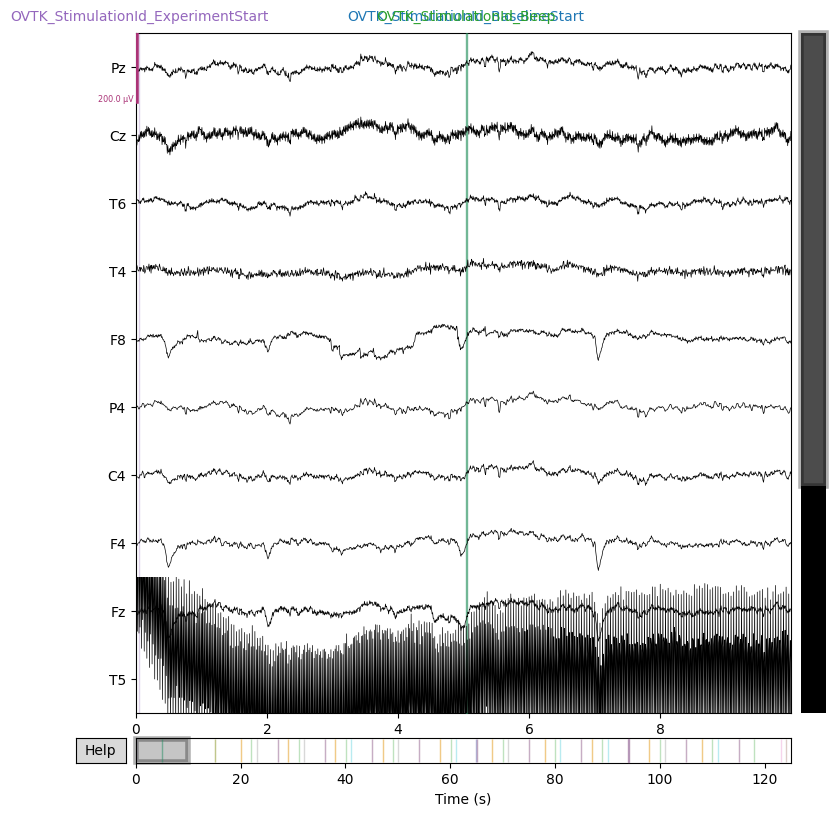

Plotting CLEAN (EEG-only)…


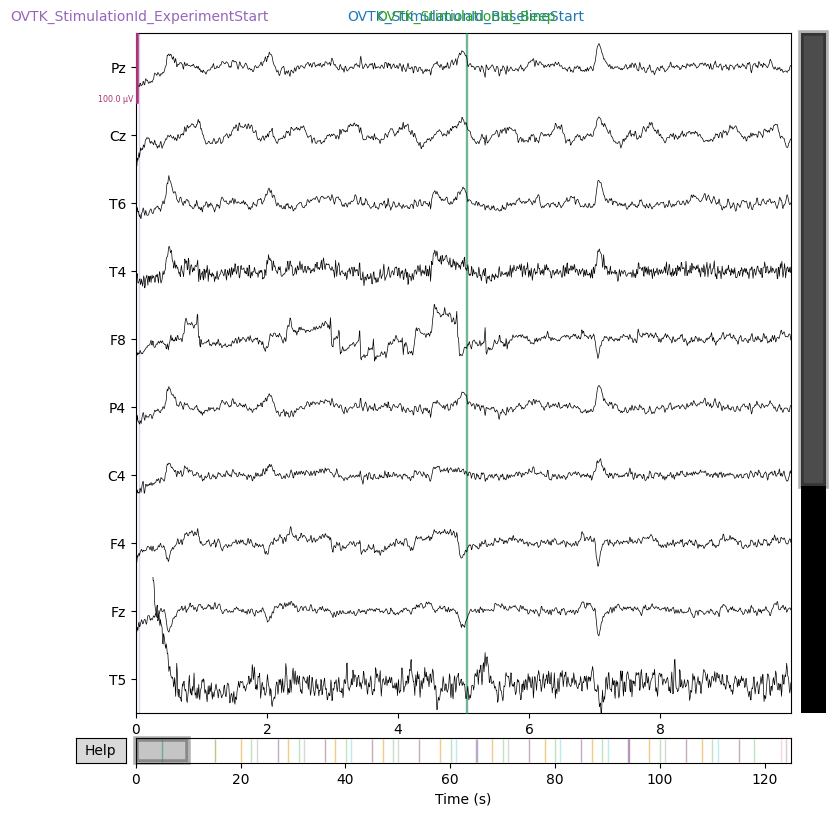

In [ ]:
# ===== Preprocessing: RAW -> CLEAN (save + plot) =====
from pathlib import Path
import glob, re
import numpy as np
import mne
from mne_bids import BIDSPath, read_raw_bids, get_entities_from_fname

# ---------- Config ----------
BIDS_ROOT = Path("/content/data/ds003810")
SUBJECTS  = [f"{i:02d}" for i in range(2, 7)]  # sub-02..sub-06
TASK_NAME = "MIvsRest"
OUT_DIR   = Path("/content/clean")
OUT_DIR.mkdir(parents=True, exist_ok=True)

# ---------- Helpers ----------
def list_eeg_files_for_subject(subj: str):
    """Return sorted list of REAL EEG files for this subject (ignore .json sidecars)."""
    pats = []
    for ext in (".edf", ".vhdr", ".set"):  # common EEG formats
        pats += glob.glob(str(BIDS_ROOT / f"sub-{subj}" / "**" / "eeg" / f"*task-{TASK_NAME}*{ext}"),
                          recursive=True)
    return sorted(pats)

def load_raw_auto_fix_units(eeg_file: str) -> mne.io.BaseRaw:
    """Load RAW; if amplitudes look like µV stored as V, convert EEG channels µV->V once."""
    ents = get_entities_from_fname(eeg_file)
    bp = BIDSPath(subject=ents.get("subject"),
                  session=ents.get("session"),
                  task=ents.get("task"),
                  run=ents.get("run"),
                  datatype="eeg",
                  root=BIDS_ROOT)
    raw = read_raw_bids(bids_path=bp, verbose=False)
    raw.load_data()

    picks_eeg = mne.pick_types(raw.info, eeg=True, stim=False, eog=False, ecg=False, emg=False, misc=False)
    x = raw.get_data(picks=picks_eeg)                  # volts (as interpreted by MNE)
    p2p_v = np.ptp(x, axis=1).mean()
    if p2p_v > 1.0:                                    # absurd for EEG if in volts
        raw.apply_function(lambda d: d * 1e-6, picks=picks_eeg)  # µV -> V
    return raw

def preprocess_raw(raw: mne.io.BaseRaw) -> mne.io.BaseRaw:
    """Band-pass, valid notch (< Nyquist), average ref, resample-down."""
    clean = raw.copy()
    picks_eeg = mne.pick_types(clean.info, eeg=True, stim=False, eog=False, ecg=False, emg=False, misc=False)
    sf = float(clean.info['sfreq'])

    # Band-pass safely under Nyquist
    l_freq = 1.0
    h_freq = min(40.0, max(10.0, sf/2.0 - 2.0))
    clean.filter(l_freq=l_freq, h_freq=h_freq, picks=picks_eeg, fir_design='firwin')

    # Notch only if valid for this sfreq
    mains = [50.0, 100.0]  # change to [60.0, 120.0] if needed
    valid_notches = [f for f in mains if f < sf/2.0 - 1.0]
    if valid_notches:
        clean.notch_filter(freqs=valid_notches, picks=picks_eeg)

    # Average reference and resample (down only)
    clean.set_eeg_reference('average', projection=False)
    target = 256.0
    if sf > target:
        clean.resample(target)
    return clean

# ---------- Run over subjects/runs ----------
processed = []
first_pair = None

for subj in SUBJECTS:
    eeg_files = list_eeg_files_for_subject(subj)
    if not eeg_files:
        print(f"[sub-{subj}] no EEG files found — skipping.")
        continue

    for eeg_file in eeg_files:
        # Load raw (auto-fix units)
        raw = load_raw_auto_fix_units(eeg_file)

        # Save entities for naming
        ents = get_entities_from_fname(eeg_file)
        run = ents.get("run")
        run_tag = f"_run-{run}" if run is not None else ""

        # Preprocess
        clean = preprocess_raw(raw)

        # Save CLEAN to FIF
        out_fname = OUT_DIR / f"sub-{subj}_task-{TASK_NAME}{run_tag}_raw_clean.fif"
        clean.save(out_fname, overwrite=True, verbose=False)
        processed.append(out_fname.as_posix())
        print(f"✔ Saved: {out_fname.name} | sf_clean={clean.info['sfreq']:.1f} Hz, nchan={clean.info['nchan']}")

        # Keep the first pair for plotting (RAW vs CLEAN)
        if first_pair is None:
            first_pair = (raw, clean)

print(f"\nTotal cleaned files: {len(processed)}")
if processed:
    print("Example saved file:", processed[0])

# ---------- Plot RAW vs CLEAN for the first processed file ----------
if first_pair is not None:
    raw_example, clean_example = first_pair

    # quick sanity: amplitudes now should be tens–hundreds of µV
    picks = mne.pick_types(raw_example.info, eeg=True)
    mean_p2p_uV = np.ptp(raw_example.get_data(picks=picks), axis=1).mean() * 1e6
    print(f"\nMean peak-to-peak after load (µV): {mean_p2p_uV:.1f}")

    print("Plotting RAW (EEG-only)…")
    raw_example.plot(picks='eeg', n_channels=10, duration=10, scalings=dict(eeg=100e-6))

    print("Plotting CLEAN (EEG-only)…")
    clean_example.plot(picks='eeg', n_channels=10, duration=10, scalings=dict(eeg=50e-6))
else:
    print("No files were processed; nothing to plot.")

In [ ]:

from pathlib import Path
import mne
from mne_bids import BIDSPath, read_raw_bids, get_entity_vals

# All comments inside code are in English only.
from pathlib import Path
import re, glob
import mne
from mne_bids import BIDSPath, read_raw_bids, get_entity_vals

bids_root = Path("/content/data/ds003810")
out_root  = Path("/content/clean")
out_root.mkdir(parents=True, exist_ok=True)

# We process sub-01..sub-05
subjects = [f"{i:02d}" for i in range(2, 7)]

# Dataset-level task name (as shown in your log): "MIvsRest"
tasks = get_entity_vals(bids_root, 'task', ignore_dirs=['derivatives'])
assert 'MIvsRest' in tasks, f"Expected task 'MIvsRest' in {tasks}"
task = 'MIvsRest'
print("Using task:", task)

def preprocess_raw(raw, l_freq=1.0, h_freq=40.0, notch_freqs=[50], sfreq_target=128):
    raw.load_data()
    raw.set_montage('standard_1020', match_case=False, on_missing='warn')
    raw.filter(l_freq=l_freq, h_freq=h_freq, fir_design='firwin')
    if notch_freqs:
        raw.notch_filter(freqs=notch_freqs)
    raw.set_eeg_reference('average', projection=False)
    raw.resample(sfreq_target)
    return raw

processed = []

for subj in subjects:
    # ---- Find runs by globbing subject's EEG files ----
    # We search recursively to handle possible ses-XX levels.
    patt = str(bids_root / f"sub-{subj}" / "**" / "eeg" / f"*task-{task}*run-*_eeg.*")
    files = glob.glob(patt, recursive=True)
    # Extract run numbers like run-1, run-01, run-2, ...
    runs = sorted({re.search(r"run-(\d+)", f).group(1) for f in files if re.search(r"run-(\d+)", f)})
    print(f"Subject {subj} has runs:", runs)

    for run in runs:
        try:
            # Build a BIDSPath for this (subj, run)
            bids_path = BIDSPath(subject=subj, task=task, run=run, datatype='eeg', root=bids_root)

            raw = read_raw_bids(bids_path=bids_path, verbose=False)  # auto-detects extension/suffix
            raw = preprocess_raw(raw)

            out_fname = out_root / f"sub-{subj}_task-{task}_run-{run}_raw_clean.fif"
            raw.save(out_fname, overwrite=True)
            processed.append((subj, run, out_fname.as_posix(), raw.info['sfreq'], raw.info['nchan']))
            print(f"✔ Saved: {out_fname} | sfreq={raw.info['sfreq']}, nchan={raw.info['nchan']}")
        except Exception as e:
            print(f"… Skipped sub-{subj}, run-{run}: {e}")

print("\nSummary of cleaned files:")
for p in processed:
    print(p)
print(f"\nTotal cleaned files: {len(processed)}")

Using task: MIvsRest
Subject 02 has runs: ['0', '1', '2', '3', '4']
Reading 0 ... 15624  =      0.000 ...   124.992 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 413 samples (3.304 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation

/tmp/ipython-input-1058650252.py:50: RuntimeWarning: Did not find any events.tsv associated with sub-02_task-MIvsRest_run-0.

The search_str was "/content/data/ds003810/sub-02/**/eeg/sub-02*events.tsv"
  raw = read_raw_bids(bids_path=bids_path, verbose=False)  # auto-detects extension/suffix
/tmp/ipython-input-1058650252.py:50: RuntimeWarning: Unable to map the following column(s) to to MNE:
gender: M
dominant hand: R
  raw = read_raw_bids(bids_path=bids_path, verbose=False)  # auto-detects extension/suffix


Overwriting existing file.
Writing /content/clean/sub-02_task-MIvsRest_run-0_raw_clean.fif
Overwriting existing file.
Closing /content/clean/sub-02_task-MIvsRest_run-0_raw_clean.fif
[done]
✔ Saved: /content/clean/sub-02_task-MIvsRest_run-0_raw_clean.fif | sfreq=128.0, nchan=15
Reading 0 ... 55874  =      0.000 ...   446.992 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 413 samples (3.304 s)



/tmp/ipython-input-1058650252.py:54: RuntimeWarning: This filename (/content/clean/sub-02_task-MIvsRest_run-0_raw_clean.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(out_fname, overwrite=True)
/tmp/ipython-input-1058650252.py:50: RuntimeWarning: Did not find any events.tsv associated with sub-02_task-MIvsRest_run-1.

The search_str was "/content/data/ds003810/sub-02/**/eeg/sub-02*events.tsv"
  raw = read_raw_bids(bids_path=bids_path, verbose=False)  # auto-detects extension/suffix
/tmp/ipython-input-1058650252.py:50: RuntimeWarning: Unable to map the following column(s) to to MNE:
gender: M
dominant hand: R
  raw = read_raw_bids(bids_path=bids_path, verbose=False)  # auto-detects extension/suffix


Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 825 samples (6.600 s)

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Overwriting existing file.
Writing /content/clean/sub-02_task-MIvsRest_run-1_raw_clean.fif
Overwriting existing file.
Closing /content/clean/sub-02_task-MIvsRest_run-1_raw_clean.fif
[done]


/tmp/ipython-input-1058650252.py:54: RuntimeWarning: This filename (/content/clean/sub-02_task-MIvsRest_run-1_raw_clean.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(out_fname, overwrite=True)


✔ Saved: /content/clean/sub-02_task-MIvsRest_run-1_raw_clean.fif | sfreq=128.0, nchan=15
Reading 0 ... 54624  =      0.000 ...   436.992 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 413 samples (3.304 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB

/tmp/ipython-input-1058650252.py:50: RuntimeWarning: Omitted 1 annotation(s) that were outside data range.
  raw = read_raw_bids(bids_path=bids_path, verbose=False)  # auto-detects extension/suffix
/tmp/ipython-input-1058650252.py:50: RuntimeWarning: Did not find any events.tsv associated with sub-02_task-MIvsRest_run-2.

The search_str was "/content/data/ds003810/sub-02/**/eeg/sub-02*events.tsv"
  raw = read_raw_bids(bids_path=bids_path, verbose=False)  # auto-detects extension/suffix
/tmp/ipython-input-1058650252.py:50: RuntimeWarning: Unable to map the following column(s) to to MNE:
gender: M
dominant hand: R
  raw = read_raw_bids(bids_path=bids_path, verbose=False)  # auto-detects extension/suffix


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Overwriting existing file.
Writing /content/clean/sub-02_task-MIvsRest_run-2_raw_clean.fif
Overwriting existing file.
Closing /content/clean/sub-02_task-MIvsRest_run-2_raw_clean.fif
[done]
✔ Saved: /content/clean/sub-02_task-MIvsRest_run-2_raw_clean.fif | sfreq=128.0, nchan=15
Reading 0 ... 42374  =      0.000 ...   338.992 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 413 samples (3.30

/tmp/ipython-input-1058650252.py:54: RuntimeWarning: This filename (/content/clean/sub-02_task-MIvsRest_run-2_raw_clean.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(out_fname, overwrite=True)
/tmp/ipython-input-1058650252.py:50: RuntimeWarning: Did not find any events.tsv associated with sub-02_task-MIvsRest_run-3.

The search_str was "/content/data/ds003810/sub-02/**/eeg/sub-02*events.tsv"
  raw = read_raw_bids(bids_path=bids_path, verbose=False)  # auto-detects extension/suffix
/tmp/ipython-input-1058650252.py:50: RuntimeWarning: Unable to map the following column(s) to to MNE:
gender: M
dominant hand: R
  raw = read_raw_bids(bids_path=bids_path, verbose=False)  # auto-detects extension/suffix


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Overwriting existing file.
Writing /content/clean/sub-02_task-MIvsRest_run-3_raw_clean.fif
Overwriting existing file.
Closing /content/clean/sub-02_task-MIvsRest_run-3_raw_clean.fif
[done]
✔ Saved: /content/clean/sub-02_task-MIvsRest_run-3_raw_clean.fif | sfreq=128.0, nchan=15
Reading 0 ... 53874  =      0.000 ...   430.992 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 413 samples (3.30

/tmp/ipython-input-1058650252.py:54: RuntimeWarning: This filename (/content/clean/sub-02_task-MIvsRest_run-3_raw_clean.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(out_fname, overwrite=True)
/tmp/ipython-input-1058650252.py:50: RuntimeWarning: Did not find any events.tsv associated with sub-02_task-MIvsRest_run-4.

The search_str was "/content/data/ds003810/sub-02/**/eeg/sub-02*events.tsv"
  raw = read_raw_bids(bids_path=bids_path, verbose=False)  # auto-detects extension/suffix
/tmp/ipython-input-1058650252.py:50: RuntimeWarning: Unable to map the following column(s) to to MNE:
gender: M
dominant hand: R
  raw = read_raw_bids(bids_path=bids_path, verbose=False)  # auto-detects extension/suffix


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Overwriting existing file.
Writing /content/clean/sub-02_task-MIvsRest_run-4_raw_clean.fif
Overwriting existing file.
Closing /content/clean/sub-02_task-MIvsRest_run-4_raw_clean.fif
[done]
✔ Saved: /content/clean/sub-02_task-MIvsRest_run-4_raw_clean.fif | sfreq=128.0, nchan=15
Subject 03 has runs: ['0', '1', '2', '3', '4']
Reading 0 ... 15999  =      0.000 ...   127.992 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequenc

/tmp/ipython-input-1058650252.py:54: RuntimeWarning: This filename (/content/clean/sub-02_task-MIvsRest_run-4_raw_clean.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(out_fname, overwrite=True)
/tmp/ipython-input-1058650252.py:50: RuntimeWarning: Did not find any events.tsv associated with sub-03_task-MIvsRest_run-0.

The search_str was "/content/data/ds003810/sub-03/**/eeg/sub-03*events.tsv"
  raw = read_raw_bids(bids_path=bids_path, verbose=False)  # auto-detects extension/suffix
/tmp/ipython-input-1058650252.py:50: RuntimeWarning: Unable to map the following column(s) to to MNE:
gender: F
dominant hand: R
  raw = read_raw_bids(bids_path=bids_path, verbose=False)  # auto-detects extension/suffix


Overwriting existing file.
Writing /content/clean/sub-03_task-MIvsRest_run-0_raw_clean.fif
Overwriting existing file.
Closing /content/clean/sub-03_task-MIvsRest_run-0_raw_clean.fif
[done]
✔ Saved: /content/clean/sub-03_task-MIvsRest_run-0_raw_clean.fif | sfreq=128.0, nchan=15
Reading 0 ... 53499  =      0.000 ...   427.992 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 413 samples (3.304 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parame

/tmp/ipython-input-1058650252.py:54: RuntimeWarning: This filename (/content/clean/sub-03_task-MIvsRest_run-0_raw_clean.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(out_fname, overwrite=True)
/tmp/ipython-input-1058650252.py:50: RuntimeWarning: Omitted 1 annotation(s) that were outside data range.
  raw = read_raw_bids(bids_path=bids_path, verbose=False)  # auto-detects extension/suffix
/tmp/ipython-input-1058650252.py:50: RuntimeWarning: Did not find any events.tsv associated with sub-03_task-MIvsRest_run-1.

The search_str was "/content/data/ds003810/sub-03/**/eeg/sub-03*events.tsv"
  raw = read_raw_bids(bids_path=bids_path, verbose=False)  # auto-detects extension/suffix
/tmp/ipython-input-1058650252.py:50: RuntimeWarning: Unable to map the following column(s) to to MNE:
gender: F
dominan

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Overwriting existing file.
Writing /content/clean/sub-03_task-MIvsRest_run-1_raw_clean.fif
Overwriting existing file.
Closing /content/clean/sub-03_task-MIvsRest_run-1_raw_clean.fif
[done]
✔ Saved: /content/clean/sub-03_task-MIvsRest_run-1_raw_clean.fif | sfreq=128.0, nchan=15
Reading 0 ... 54999  =      0.000 ...   439.992 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 413 samples (3.30

/tmp/ipython-input-1058650252.py:54: RuntimeWarning: This filename (/content/clean/sub-03_task-MIvsRest_run-1_raw_clean.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(out_fname, overwrite=True)
/tmp/ipython-input-1058650252.py:50: RuntimeWarning: Omitted 1 annotation(s) that were outside data range.
  raw = read_raw_bids(bids_path=bids_path, verbose=False)  # auto-detects extension/suffix
/tmp/ipython-input-1058650252.py:50: RuntimeWarning: Did not find any events.tsv associated with sub-03_task-MIvsRest_run-2.

The search_str was "/content/data/ds003810/sub-03/**/eeg/sub-03*events.tsv"
  raw = read_raw_bids(bids_path=bids_path, verbose=False)  # auto-detects extension/suffix
/tmp/ipython-input-1058650252.py:50: RuntimeWarning: Unable to map the following column(s) to to MNE:
gender: F
dominan

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Overwriting existing file.
Writing /content/clean/sub-03_task-MIvsRest_run-2_raw_clean.fif
Overwriting existing file.
Closing /content/clean/sub-03_task-MIvsRest_run-2_raw_clean.fif
[done]
✔ Saved: /content/clean/sub-03_task-MIvsRest_run-2_raw_clean.fif | sfreq=128.0, nchan=15
Reading 0 ... 55124  =      0.000 ...   440.992 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 413 samples (3.30

/tmp/ipython-input-1058650252.py:54: RuntimeWarning: This filename (/content/clean/sub-03_task-MIvsRest_run-2_raw_clean.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(out_fname, overwrite=True)
/tmp/ipython-input-1058650252.py:50: RuntimeWarning: Did not find any events.tsv associated with sub-03_task-MIvsRest_run-3.

The search_str was "/content/data/ds003810/sub-03/**/eeg/sub-03*events.tsv"
  raw = read_raw_bids(bids_path=bids_path, verbose=False)  # auto-detects extension/suffix
/tmp/ipython-input-1058650252.py:50: RuntimeWarning: Unable to map the following column(s) to to MNE:
gender: F
dominant hand: R
  raw = read_raw_bids(bids_path=bids_path, verbose=False)  # auto-detects extension/suffix


Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 825 samples (6.600 s)

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Overwriting existing file.
Writing /content/clean/sub-03_task-MIvsRest_run-3_raw_clean.fif
Overwriting existing file.
Closing /content/clean/sub-03_task-MIvsRest_run-3_raw_clean.fif
[done]
✔ Saved: /content/clean/sub-03_task-MIvsRest_run-3_raw_clean.fif | sfreq=128.0, nchan=15
Reading 0 ... 55874  =      0.000 ...   446.992 

/tmp/ipython-input-1058650252.py:54: RuntimeWarning: This filename (/content/clean/sub-03_task-MIvsRest_run-3_raw_clean.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(out_fname, overwrite=True)
/tmp/ipython-input-1058650252.py:50: RuntimeWarning: Did not find any events.tsv associated with sub-03_task-MIvsRest_run-4.

The search_str was "/content/data/ds003810/sub-03/**/eeg/sub-03*events.tsv"
  raw = read_raw_bids(bids_path=bids_path, verbose=False)  # auto-detects extension/suffix
/tmp/ipython-input-1058650252.py:50: RuntimeWarning: Unable to map the following column(s) to to MNE:
gender: F
dominant hand: R
  raw = read_raw_bids(bids_path=bids_path, verbose=False)  # auto-detects extension/suffix


- Filter length: 825 samples (6.600 s)

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Overwriting existing file.
Writing /content/clean/sub-03_task-MIvsRest_run-4_raw_clean.fif
Overwriting existing file.
Closing /content/clean/sub-03_task-MIvsRest_run-4_raw_clean.fif
[done]
✔ Saved: /content/clean/sub-03_task-MIvsRest_run-4_raw_clean.fif | sfreq=128.0, nchan=15
Subject 04 has runs: ['0', '1', '2', '3', '4']
Reading 0 ... 15749  =      0.000 ...   125.992 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition ba

/tmp/ipython-input-1058650252.py:54: RuntimeWarning: This filename (/content/clean/sub-03_task-MIvsRest_run-4_raw_clean.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(out_fname, overwrite=True)
/tmp/ipython-input-1058650252.py:50: RuntimeWarning: Did not find any events.tsv associated with sub-04_task-MIvsRest_run-0.

The search_str was "/content/data/ds003810/sub-04/**/eeg/sub-04*events.tsv"
  raw = read_raw_bids(bids_path=bids_path, verbose=False)  # auto-detects extension/suffix
/tmp/ipython-input-1058650252.py:50: RuntimeWarning: Unable to map the following column(s) to to MNE:
gender: M
dominant hand: R
  raw = read_raw_bids(bids_path=bids_path, verbose=False)  # auto-detects extension/suffix


Overwriting existing file.
Writing /content/clean/sub-04_task-MIvsRest_run-0_raw_clean.fif
Overwriting existing file.
Closing /content/clean/sub-04_task-MIvsRest_run-0_raw_clean.fif
[done]
✔ Saved: /content/clean/sub-04_task-MIvsRest_run-0_raw_clean.fif | sfreq=128.0, nchan=15
Reading 0 ... 55874  =      0.000 ...   446.992 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 413 samples (3.304 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parame

/tmp/ipython-input-1058650252.py:54: RuntimeWarning: This filename (/content/clean/sub-04_task-MIvsRest_run-0_raw_clean.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(out_fname, overwrite=True)
/tmp/ipython-input-1058650252.py:50: RuntimeWarning: Omitted 1 annotation(s) that were outside data range.
  raw = read_raw_bids(bids_path=bids_path, verbose=False)  # auto-detects extension/suffix
/tmp/ipython-input-1058650252.py:50: RuntimeWarning: Did not find any events.tsv associated with sub-04_task-MIvsRest_run-1.

The search_str was "/content/data/ds003810/sub-04/**/eeg/sub-04*events.tsv"
  raw = read_raw_bids(bids_path=bids_path, verbose=False)  # auto-detects extension/suffix
/tmp/ipython-input-1058650252.py:50: RuntimeWarning: Unable to map the following column(s) to to MNE:
gender: M
dominan

- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 825 samples (6.600 s)

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Overwriting existing file.
Writing /content/clean/sub-04_task-MIvsRest_run-1_raw_clean.fif
Overwriting existing file.
Closing /content/clean/sub-04_task-MIvsRest_run-1_raw_clean.fif
[done]
✔ Saved: /content/clean/sub-04_task-MIvsRest_run-1_raw_clean.fif | sfreq=128.0, nchan=15
Reading 0 ... 54124  =      0.000 ...   432.992 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass f

/tmp/ipython-input-1058650252.py:54: RuntimeWarning: This filename (/content/clean/sub-04_task-MIvsRest_run-1_raw_clean.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(out_fname, overwrite=True)
/tmp/ipython-input-1058650252.py:50: RuntimeWarning: Omitted 1 annotation(s) that were outside data range.
  raw = read_raw_bids(bids_path=bids_path, verbose=False)  # auto-detects extension/suffix
/tmp/ipython-input-1058650252.py:50: RuntimeWarning: Did not find any events.tsv associated with sub-04_task-MIvsRest_run-2.

The search_str was "/content/data/ds003810/sub-04/**/eeg/sub-04*events.tsv"
  raw = read_raw_bids(bids_path=bids_path, verbose=False)  # auto-detects extension/suffix
/tmp/ipython-input-1058650252.py:50: RuntimeWarning: Unable to map the following column(s) to to MNE:
gender: M
dominan

- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 825 samples (6.600 s)

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Overwriting existing file.
Writing /content/clean/sub-04_task-MIvsRest_run-2_raw_clean.fif
Overwriting existing file.
Closing /content/clean/sub-04_task-MIvsRest_run-2_raw_clean.fif
[done]
✔ Saved: /content/clean/sub-04_task-MIvsRest_run-2_raw_clean.fif | sfreq=128.0, nchan=15
Reading 0 ... 54749  =      0.000 ...   437.992 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.0

/tmp/ipython-input-1058650252.py:54: RuntimeWarning: This filename (/content/clean/sub-04_task-MIvsRest_run-2_raw_clean.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(out_fname, overwrite=True)
/tmp/ipython-input-1058650252.py:50: RuntimeWarning: Did not find any events.tsv associated with sub-04_task-MIvsRest_run-3.

The search_str was "/content/data/ds003810/sub-04/**/eeg/sub-04*events.tsv"
  raw = read_raw_bids(bids_path=bids_path, verbose=False)  # auto-detects extension/suffix
/tmp/ipython-input-1058650252.py:50: RuntimeWarning: Unable to map the following column(s) to to MNE:
gender: M
dominant hand: R
  raw = read_raw_bids(bids_path=bids_path, verbose=False)  # auto-detects extension/suffix


Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 825 samples (6.600 s)

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Overwriting existing file.
Writing /content/clean/sub-04_task-MIvsRest_run-3_raw_clean.fif
Overwriting existing file.
Closing /content/clean/sub-04_task-MIvsRest_run-3_raw_clean.fif
[done]
✔ Saved: /content/clean/sub-04_task-MIvsRest_run-3_raw_clean.fif | sfreq=128.0, nchan=15
Reading 0 ... 54124  =      0.000 ...   432.992 

/tmp/ipython-input-1058650252.py:54: RuntimeWarning: This filename (/content/clean/sub-04_task-MIvsRest_run-3_raw_clean.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(out_fname, overwrite=True)
/tmp/ipython-input-1058650252.py:50: RuntimeWarning: Did not find any events.tsv associated with sub-04_task-MIvsRest_run-4.

The search_str was "/content/data/ds003810/sub-04/**/eeg/sub-04*events.tsv"
  raw = read_raw_bids(bids_path=bids_path, verbose=False)  # auto-detects extension/suffix
/tmp/ipython-input-1058650252.py:50: RuntimeWarning: Unable to map the following column(s) to to MNE:
gender: M
dominant hand: R
  raw = read_raw_bids(bids_path=bids_path, verbose=False)  # auto-detects extension/suffix


Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 825 samples (6.600 s)

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Overwriting existing file.
Writing /content/clean/sub-04_task-MIvsRest_run-4_raw_clean.fif
Overwriting existing file.
Closing /content/clean/sub-04_task-MIvsRest_run-4_raw_clean.fif
[done]
✔ Saved: /content/clean/sub-04_task-MIvsRest_run-4_raw_clean.fif | sfreq=128.0, nchan=15
Subject 05 has runs: ['0', '1', '2', '3', '4']
R

/tmp/ipython-input-1058650252.py:54: RuntimeWarning: This filename (/content/clean/sub-04_task-MIvsRest_run-4_raw_clean.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(out_fname, overwrite=True)
/tmp/ipython-input-1058650252.py:50: RuntimeWarning: Did not find any events.tsv associated with sub-05_task-MIvsRest_run-0.

The search_str was "/content/data/ds003810/sub-05/**/eeg/sub-05*events.tsv"
  raw = read_raw_bids(bids_path=bids_path, verbose=False)  # auto-detects extension/suffix
/tmp/ipython-input-1058650252.py:50: RuntimeWarning: Unable to map the following column(s) to to MNE:
gender: M
dominant hand: R
  raw = read_raw_bids(bids_path=bids_path, verbose=False)  # auto-detects extension/suffix


Overwriting existing file.
Writing /content/clean/sub-05_task-MIvsRest_run-0_raw_clean.fif
Overwriting existing file.
Closing /content/clean/sub-05_task-MIvsRest_run-0_raw_clean.fif
[done]
✔ Saved: /content/clean/sub-05_task-MIvsRest_run-0_raw_clean.fif | sfreq=128.0, nchan=15
Reading 0 ... 53999  =      0.000 ...   431.992 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 413 samples (3.304 s)



/tmp/ipython-input-1058650252.py:54: RuntimeWarning: This filename (/content/clean/sub-05_task-MIvsRest_run-0_raw_clean.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(out_fname, overwrite=True)
/tmp/ipython-input-1058650252.py:50: RuntimeWarning: Omitted 1 annotation(s) that were outside data range.
  raw = read_raw_bids(bids_path=bids_path, verbose=False)  # auto-detects extension/suffix
/tmp/ipython-input-1058650252.py:50: RuntimeWarning: Did not find any events.tsv associated with sub-05_task-MIvsRest_run-1.

The search_str was "/content/data/ds003810/sub-05/**/eeg/sub-05*events.tsv"
  raw = read_raw_bids(bids_path=bids_path, verbose=False)  # auto-detects extension/suffix
/tmp/ipython-input-1058650252.py:50: RuntimeWarning: Unable to map the following column(s) to to MNE:
gender: M
dominan

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 825 samples (6.600 s)

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Overwriting existing file.
Writing /content/clean/sub-05_task-MIvsRest_run-1_raw_clean.fif
Overwriting existing file.
Closing /content/clean/sub-05_task-MIvsRest_run-1_raw_clean.fif
[done]
✔ Saved: /content/clean/sub-05_task-MIvsRest_run-1_raw_clean.fif | sfreq=128.0, nchan=15
Reading 0 ... 55499  =      0.000 ...   443.992 

/tmp/ipython-input-1058650252.py:54: RuntimeWarning: This filename (/content/clean/sub-05_task-MIvsRest_run-1_raw_clean.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(out_fname, overwrite=True)
/tmp/ipython-input-1058650252.py:50: RuntimeWarning: Omitted 1 annotation(s) that were outside data range.
  raw = read_raw_bids(bids_path=bids_path, verbose=False)  # auto-detects extension/suffix
/tmp/ipython-input-1058650252.py:50: RuntimeWarning: Did not find any events.tsv associated with sub-05_task-MIvsRest_run-2.

The search_str was "/content/data/ds003810/sub-05/**/eeg/sub-05*events.tsv"
  raw = read_raw_bids(bids_path=bids_path, verbose=False)  # auto-detects extension/suffix
/tmp/ipython-input-1058650252.py:50: RuntimeWarning: Unable to map the following column(s) to to MNE:
gender: M
dominan

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Overwriting existing file.
Writing /content/clean/sub-05_task-MIvsRest_run-2_raw_clean.fif
Overwriting existing file.
Closing /content/clean/sub-05_task-MIvsRest_run-2_raw_clean.fif
[done]
✔ Saved: /content/clean/sub-05_task-MIvsRest_run-2_raw_clean.fif | sfreq=128.0, nchan=15
Reading 0 ... 55374  =      0.000 ...   442.992 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 413 samples (3.30

/tmp/ipython-input-1058650252.py:54: RuntimeWarning: This filename (/content/clean/sub-05_task-MIvsRest_run-2_raw_clean.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(out_fname, overwrite=True)
/tmp/ipython-input-1058650252.py:50: RuntimeWarning: Did not find any events.tsv associated with sub-05_task-MIvsRest_run-3.

The search_str was "/content/data/ds003810/sub-05/**/eeg/sub-05*events.tsv"
  raw = read_raw_bids(bids_path=bids_path, verbose=False)  # auto-detects extension/suffix
/tmp/ipython-input-1058650252.py:50: RuntimeWarning: Unable to map the following column(s) to to MNE:
gender: M
dominant hand: R
  raw = read_raw_bids(bids_path=bids_path, verbose=False)  # auto-detects extension/suffix


Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 825 samples (6.600 s)

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Overwriting existing file.
Writing /content/clean/sub-05_task-MIvsRest_run-3_raw_clean.fif
Overwriting existing file.
Closing /content/clean/sub-05_task-MIvsRest_run-3_raw_clean.fif
[done]
✔ Saved: /content/clean/sub-05_task-MIvsRest_run-3_raw_clean.fif | sfreq=128.0, nchan=15
Reading 0 ... 54124  =      0.000 ...   432.992 

/tmp/ipython-input-1058650252.py:54: RuntimeWarning: This filename (/content/clean/sub-05_task-MIvsRest_run-3_raw_clean.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(out_fname, overwrite=True)
/tmp/ipython-input-1058650252.py:50: RuntimeWarning: Did not find any events.tsv associated with sub-05_task-MIvsRest_run-4.

The search_str was "/content/data/ds003810/sub-05/**/eeg/sub-05*events.tsv"
  raw = read_raw_bids(bids_path=bids_path, verbose=False)  # auto-detects extension/suffix
/tmp/ipython-input-1058650252.py:50: RuntimeWarning: Unable to map the following column(s) to to MNE:
gender: M
dominant hand: R
  raw = read_raw_bids(bids_path=bids_path, verbose=False)  # auto-detects extension/suffix


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Overwriting existing file.
Writing /content/clean/sub-05_task-MIvsRest_run-4_raw_clean.fif
Overwriting existing file.
Closing /content/clean/sub-05_task-MIvsRest_run-4_raw_clean.fif
[done]
✔ Saved: /content/clean/sub-05_task-MIvsRest_run-4_raw_clean.fif | sfreq=128.0, nchan=15
Subject 06 has runs: ['0', '1', '2', '3', '4']
Reading 0 ... 15624  =      0.000 ...   124.992 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequenc

/tmp/ipython-input-1058650252.py:54: RuntimeWarning: This filename (/content/clean/sub-05_task-MIvsRest_run-4_raw_clean.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(out_fname, overwrite=True)
/tmp/ipython-input-1058650252.py:50: RuntimeWarning: Did not find any events.tsv associated with sub-06_task-MIvsRest_run-0.

The search_str was "/content/data/ds003810/sub-06/**/eeg/sub-06*events.tsv"
  raw = read_raw_bids(bids_path=bids_path, verbose=False)  # auto-detects extension/suffix
/tmp/ipython-input-1058650252.py:50: RuntimeWarning: Unable to map the following column(s) to to MNE:
gender: M
dominant hand: R
  raw = read_raw_bids(bids_path=bids_path, verbose=False)  # auto-detects extension/suffix


Overwriting existing file.
Writing /content/clean/sub-06_task-MIvsRest_run-0_raw_clean.fif
Overwriting existing file.
Closing /content/clean/sub-06_task-MIvsRest_run-0_raw_clean.fif
[done]
✔ Saved: /content/clean/sub-06_task-MIvsRest_run-0_raw_clean.fif | sfreq=128.0, nchan=15
Reading 0 ... 54999  =      0.000 ...   439.992 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 413 samples (3.304 s)



/tmp/ipython-input-1058650252.py:54: RuntimeWarning: This filename (/content/clean/sub-06_task-MIvsRest_run-0_raw_clean.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(out_fname, overwrite=True)
/tmp/ipython-input-1058650252.py:50: RuntimeWarning: Omitted 1 annotation(s) that were outside data range.
  raw = read_raw_bids(bids_path=bids_path, verbose=False)  # auto-detects extension/suffix
/tmp/ipython-input-1058650252.py:50: RuntimeWarning: Did not find any events.tsv associated with sub-06_task-MIvsRest_run-1.

The search_str was "/content/data/ds003810/sub-06/**/eeg/sub-06*events.tsv"
  raw = read_raw_bids(bids_path=bids_path, verbose=False)  # auto-detects extension/suffix
/tmp/ipython-input-1058650252.py:50: RuntimeWarning: Unable to map the following column(s) to to MNE:
gender: M
dominan

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 825 samples (6.600 s)

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Overwriting existing file.
Writing /content/clean/sub-06_task-MIvsRest_run-1_raw_clean.fif
Overwriting existing file.
Closing /content/clean/sub-06_task-MIvsRest_run-1_raw_clean.fif
[done]
✔ Saved: /content/clean/sub-06_task-MIvsRest_run-1_raw_clean.fif | sfreq=128.0, nchan=15
Reading 0 ... 54624  =      0.000 ...   436.992 

/tmp/ipython-input-1058650252.py:54: RuntimeWarning: This filename (/content/clean/sub-06_task-MIvsRest_run-1_raw_clean.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(out_fname, overwrite=True)
/tmp/ipython-input-1058650252.py:50: RuntimeWarning: Omitted 1 annotation(s) that were outside data range.
  raw = read_raw_bids(bids_path=bids_path, verbose=False)  # auto-detects extension/suffix
/tmp/ipython-input-1058650252.py:50: RuntimeWarning: Did not find any events.tsv associated with sub-06_task-MIvsRest_run-2.

The search_str was "/content/data/ds003810/sub-06/**/eeg/sub-06*events.tsv"
  raw = read_raw_bids(bids_path=bids_path, verbose=False)  # auto-detects extension/suffix
/tmp/ipython-input-1058650252.py:50: RuntimeWarning: Unable to map the following column(s) to to MNE:
gender: M
dominan

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 825 samples (6.600 s)

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Overwriting existing file.
Writing /content/clean/sub-06_task-MIvsRest_run-2_raw_clean.fif
Overwriting existing file.
Closing /content/clean/sub-06_task-MIvsRest_run-2_raw_clean.fif
[done]
✔ Saved: /content/clean/sub-06_task-MIvsRest_run-2_raw_clean.fif | sfreq=128.0, nchan=15
Reading 0 ... 56249  =      0.000 ...   449.992 

/tmp/ipython-input-1058650252.py:54: RuntimeWarning: This filename (/content/clean/sub-06_task-MIvsRest_run-2_raw_clean.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(out_fname, overwrite=True)
/tmp/ipython-input-1058650252.py:50: RuntimeWarning: Did not find any events.tsv associated with sub-06_task-MIvsRest_run-3.

The search_str was "/content/data/ds003810/sub-06/**/eeg/sub-06*events.tsv"
  raw = read_raw_bids(bids_path=bids_path, verbose=False)  # auto-detects extension/suffix
/tmp/ipython-input-1058650252.py:50: RuntimeWarning: Unable to map the following column(s) to to MNE:
gender: M
dominant hand: R
  raw = read_raw_bids(bids_path=bids_path, verbose=False)  # auto-detects extension/suffix


Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 825 samples (6.600 s)

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Overwriting existing file.
Writing /content/clean/sub-06_task-MIvsRest_run-3_raw_clean.fif
Overwriting existing file.
Closing /content/clean/sub-06_task-MIvsRest_run-3_raw_clean.fif
[done]
✔ Saved: /content/clean/sub-06_task-MIvsRest_run-3_raw_clean.fif | sfreq=128.0, nchan=15
Reading 0 ... 54624  =      0.000 ...   436.992 

/tmp/ipython-input-1058650252.py:54: RuntimeWarning: This filename (/content/clean/sub-06_task-MIvsRest_run-3_raw_clean.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(out_fname, overwrite=True)
/tmp/ipython-input-1058650252.py:50: RuntimeWarning: Did not find any events.tsv associated with sub-06_task-MIvsRest_run-4.

The search_str was "/content/data/ds003810/sub-06/**/eeg/sub-06*events.tsv"
  raw = read_raw_bids(bids_path=bids_path, verbose=False)  # auto-detects extension/suffix
/tmp/ipython-input-1058650252.py:50: RuntimeWarning: Unable to map the following column(s) to to MNE:
gender: M
dominant hand: R
  raw = read_raw_bids(bids_path=bids_path, verbose=False)  # auto-detects extension/suffix


Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 825 samples (6.600 s)

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Overwriting existing file.
Writing /content/clean/sub-06_task-MIvsRest_run-4_raw_clean.fif
Overwriting existing file.
Closing /content/clean/sub-06_task-MIvsRest_run-4_raw_clean.fif
[done]
✔ Saved: /content/clean/sub-06_task-MIvsRest_run-4_raw_clean.fif | sfreq=128.0, nchan=15

Summary of cleaned files:
('02', '0', '/content

/tmp/ipython-input-1058650252.py:54: RuntimeWarning: This filename (/content/clean/sub-06_task-MIvsRest_run-4_raw_clean.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(out_fname, overwrite=True)


In [ ]:
def preprocess_for_view(raw):
    """Safe view: bandpass, valid notch, average ref, then resample."""
    view = raw.copy()
    picks_eeg = mne.pick_types(view.info, eeg=True, stim=False, eog=False, ecg=False, emg=False, misc=False)
    sf = float(view.info['sfreq'])

    # --- Safe band limits ---
    l_freq = 1.0
    # ensure h_freq < Nyquist with margin 2 Hz
    h_freq = min(40.0, max(10.0, sf/2.0 - 2.0))
    view.filter(l_freq=l_freq, h_freq=h_freq, picks=picks_eeg, fir_design='firwin')

    # --- Safe notch list (drop any > Nyquist - 1 Hz) ---
    desired = [50.0, 100.0]  # change to [60, 120] if your mains is 60 Hz
    valid_notches = [f for f in desired if f < sf/2.0 - 1.0]
    if len(valid_notches) > 0:
        view.notch_filter(freqs=valid_notches, picks=picks_eeg)

    # --- Average reference ---
    view.set_eeg_reference('average', projection=False)

    # --- Resample (down only; keep <= original) ---
    target = 256.0
    if sf > target:
        view.resample(target)
    # if original sf is 125, we keep it (no upsampling)
    return view

Reading 0 ... 15624  =      0.000 ...   124.992 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 413 samples (3.304 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz 

/tmp/ipython-input-582606414.py:14: RuntimeWarning: Did not find any events.tsv associated with sub-06_task-MIvsRest_run-0.

The search_str was "/content/data/ds003810/sub-06/**/eeg/sub-06*events.tsv"
  raw = read_raw_bids(bids_path=bp, verbose=False)
/tmp/ipython-input-582606414.py:14: RuntimeWarning: Unable to map the following column(s) to to MNE:
gender: M
dominant hand: R
  raw = read_raw_bids(bids_path=bp, verbose=False)


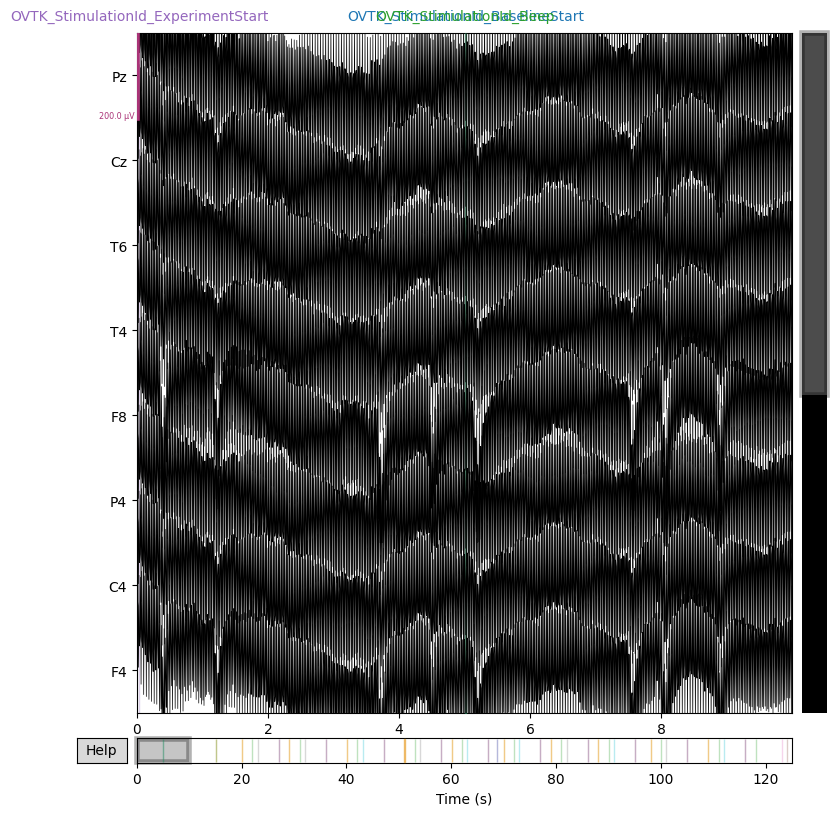

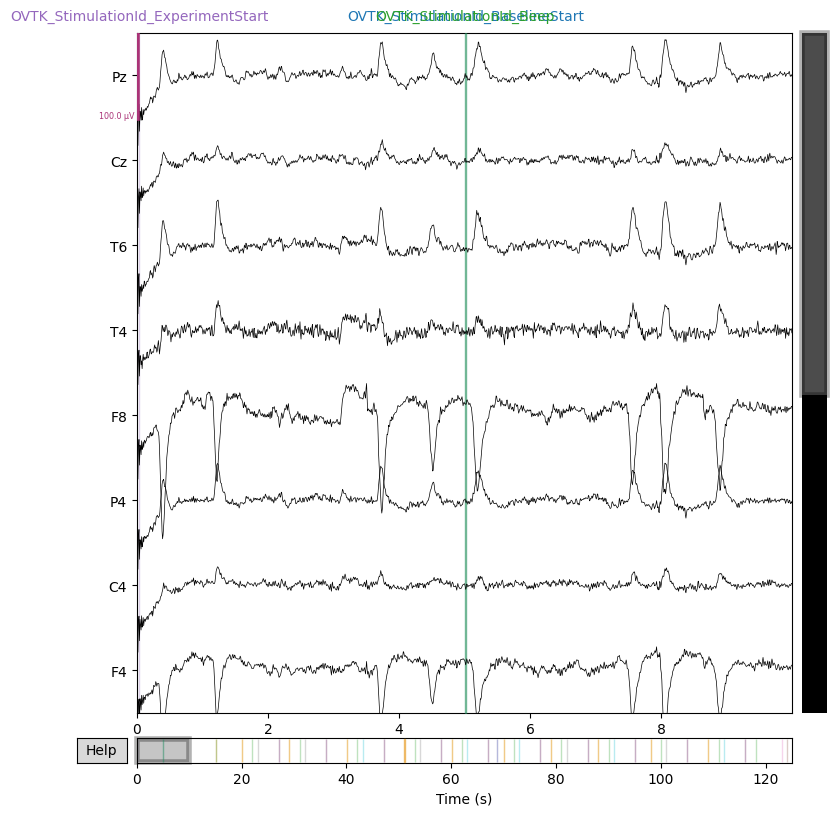

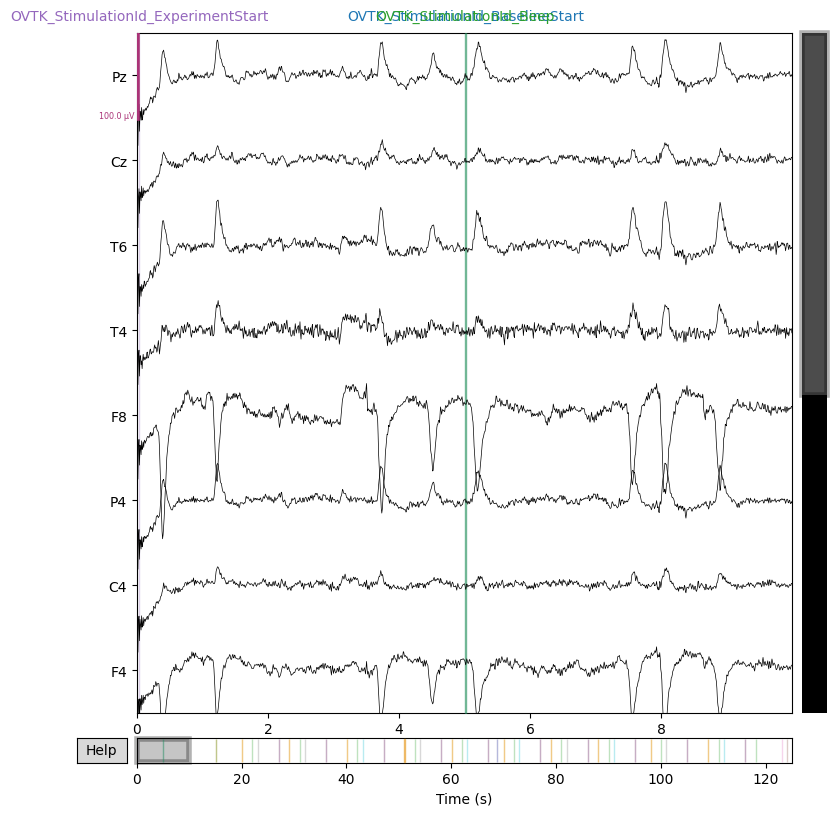

In [ ]:
raw = load_raw_auto_fix_units(eeg_file)
view = preprocess_for_view(raw)

raw.plot(picks='eeg', n_channels=8, duration=10, scalings=dict(eeg=100e-6))
view.plot(picks='eeg', n_channels=8, duration=10, scalings=dict(eeg=50e-6))

In [ ]:
import numpy as np

# Only EEG channels
picks = mne.pick_types(raw_raw.info, eeg=True, misc=False, stim=False, eog=False, ecg=False, emg=False)
data = raw_raw.get_data(picks=picks)  # Volts expected

ptp_v   = np.ptp(data, axis=1).mean()          # mean peak-to-peak per channel (V)
std_v   = data.std(axis=1).mean()              # mean std (V)
print(f"Mean p2p ~ {ptp_v:.2e} V, Mean std ~ {std_v:.2e} V")
print(f"In microvolts: p2p ~ {ptp_v*1e6:.1f} µV, std ~ {std_v*1e6:.1f} µV")

Mean p2p ~ 7.52e+02 V, Mean std ~ 7.46e+01 V
In microvolts: p2p ~ 752399692.3 µV, std ~ 74568641.4 µV


After fix | Mean p2p ~ 7.52e-04 V (752.4 µV), std ~ 7.46e-05 V (74.6 µV)
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 413 samples (3.304 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition ba

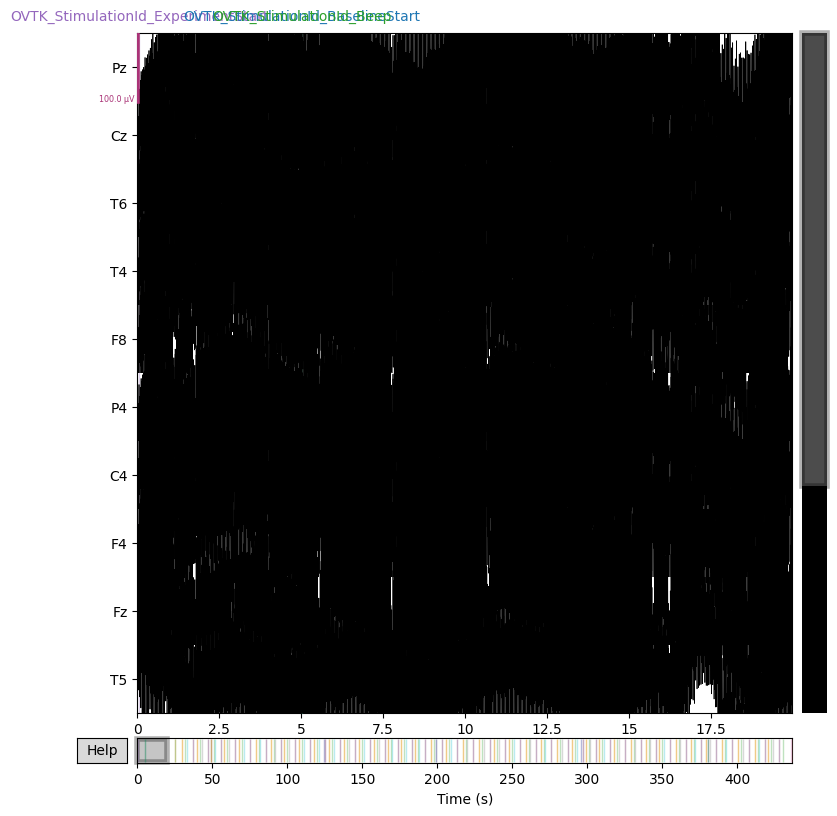

Plotting CLEAN...


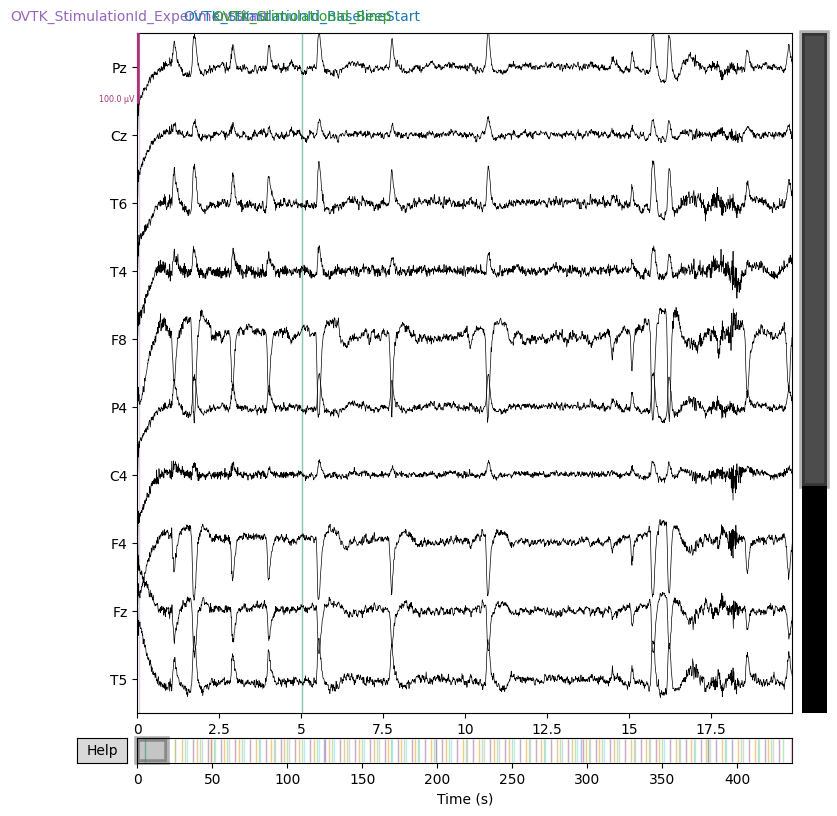

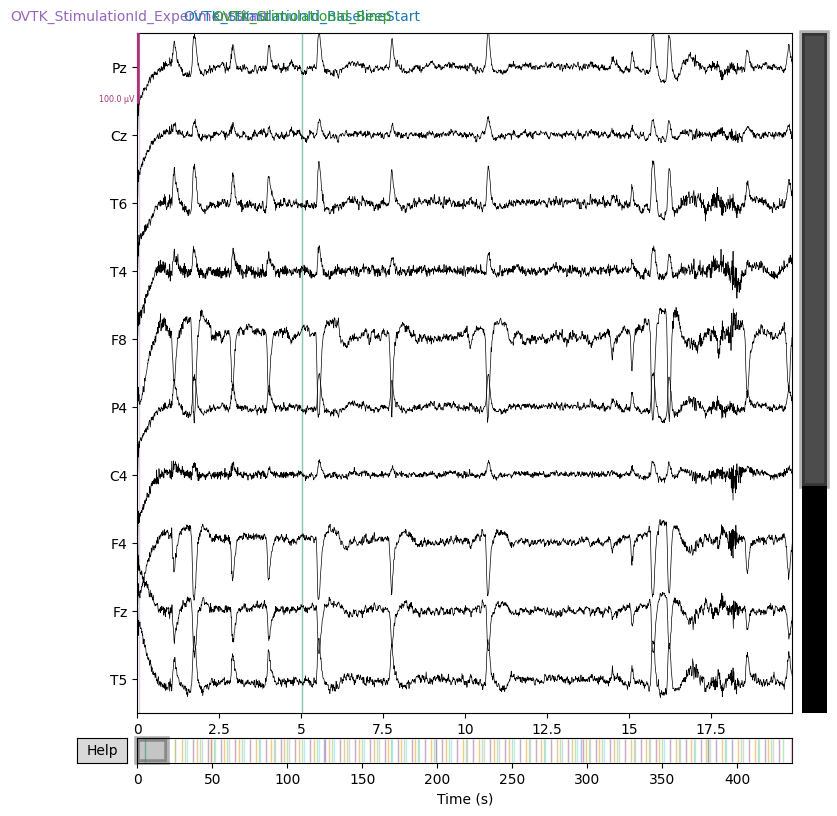

In [ ]:

import numpy as np
import mne

# 1) Convert EEG channels from microvolts to volts (apply ONCE!)
eeg_picks = mne.pick_types(raw_raw.info, eeg=True, stim=False, eog=False, ecg=False, emg=False, misc=False)
raw_raw.apply_function(lambda x: x * 1e-6, picks=eeg_picks)  # µV -> V

# 2) Re-check amplitude sanity
data = raw_raw.get_data(picks=eeg_picks)
ptp_v = np.ptp(data, axis=1).mean()
std_v = data.std(axis=1).mean()
print(f"After fix | Mean p2p ~ {ptp_v:.2e} V ({ptp_v*1e6:.1f} µV), std ~ {std_v:.2e} V ({std_v*1e6:.1f} µV)")

# 3) Rebuild a clean copy *after* unit fix
raw_clean = raw_raw.copy()
raw_clean.filter(l_freq=1., h_freq=40., fir_design='firwin')
raw_clean.notch_filter(freqs=[50])
raw_clean.set_eeg_reference('average', projection=False)
raw_clean.resample(128)

# 4) Plot both with correct scaling (50 µV) and EEG-only picks
sc = dict(eeg=50e-6)  # 50 microvolts
print("Plotting RAW (fixed units)...")
raw_raw.plot(picks='eeg', n_channels=10, duration=20, scalings=sc)

print("Plotting CLEAN...")
raw_clean.plot(picks='eeg', n_channels=10, duration=20, scalings=sc)

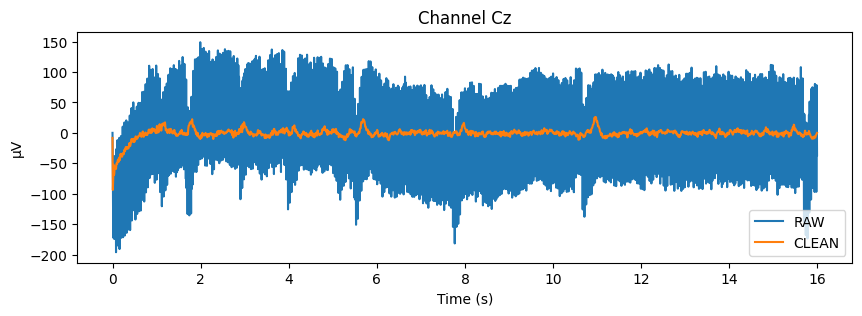

In [ ]:
import matplotlib.pyplot as plt

ch = 'Cz'
idx = raw_raw.ch_names.index(ch)
t = raw_raw.times[:2000]  # first ~2 seconds if sfreq ~1kHz
sig_raw = raw_raw.get_data(picks=[idx])[0][:2000]
sig_cln = raw_clean.get_data(picks=[idx])[0][:2000]

plt.figure(figsize=(10,3))
plt.plot(t, sig_raw*1e6, label="RAW")   # convert to µV
plt.plot(t, sig_cln*1e6, label="CLEAN")
plt.ylabel("µV")
plt.xlabel("Time (s)")
plt.legend()
plt.title(f"Channel {ch}")
plt.show()

In [107]:
# ===== CELL 1: Batch preprocessing for sub-02..sub-06 and save clean FIFs =====
from pathlib import Path
import glob, numpy as np, mne
from mne_bids import BIDSPath, read_raw_bids, get_entities_from_fname

# ---------- Config ----------
BIDS_ROOT = Path("/content/data/ds003810")
SUBJECTS  = [f"{i:02d}" for i in range(2, 7)]  # 02..06
TASK_NAME = "MIvsRest"
CLEAN_DIR = Path("/content/clean"); CLEAN_DIR.mkdir(parents=True, exist_ok=True)

BANDPASS = (1.0, 40.0)     # safe EEG band
MAINS    = [50.0, 100.0]   # change to [60.0, 120.0] if your mains is 60 Hz
TARGET_SFREQ = 256.0       # downsample only if original sfreq > this

# ---------- Helpers ----------
def list_eeg_files(subj: str):
    cands = []
    for ext in (".edf", ".vhdr", ".set"):
        cands += glob.glob(str(BIDS_ROOT / f"sub-{subj}" / "**" / "eeg" / f"*{ext}"), recursive=True)
    return sorted(cands)

def load_raw_fix_units(eeg_file: str):
    """Load RAW via BIDS; if amplitudes look like µV interpreted as V, scale EEG once (µV->V)."""
    ents = get_entities_from_fname(eeg_file)
    bp = BIDSPath(subject=ents.get("subject"),
                  session=ents.get("session"),
                  task=ents.get("task"),
                  run=ents.get("run"),
                  datatype="eeg",
                  root=BIDS_ROOT)
    raw = read_raw_bids(bids_path=bp, verbose=False); raw.load_data()
    picks = mne.pick_types(raw.info, eeg=True, stim=False, eog=False, ecg=False, emg=False, misc=False)
    x = raw.get_data(picks=picks)
    if np.ptp(x, axis=1).mean() > 1.0:  # absurd if truly volts -> actually µV stored
        raw.apply_function(lambda d: d * 1e-6, picks=picks)  # µV->V exactly once
    return raw, ents

def preprocess_uniform(raw: mne.io.BaseRaw) -> mne.io.BaseRaw:
    """Uniform pipeline for ALL: HPF/LPF safe under Nyquist, valid notch, average ref, downsample↓."""
    clean = raw.copy()
    picks = mne.pick_types(clean.info, eeg=True, stim=False, eog=False, ecg=False, emg=False, misc=False)
    sf = float(clean.info['sfreq'])

    # 1) band-pass
    l_freq, h_freq = BANDPASS
    h_freq = min(h_freq, max(10.0, sf/2.0 - 2.0))
    clean.filter(l_freq=l_freq, h_freq=h_freq, picks=picks, fir_design='firwin')

    # 2) notch (only valid freqs under Nyquist-1 Hz)
    valid_notches = [f for f in MAINS if f < sf/2.0 - 1.0]
    if valid_notches:
        clean.notch_filter(valid_notches, picks=picks)

    # 3) average reference
    clean.set_eeg_reference('average', projection=False)

    # 4) downsample
    if sf > TARGET_SFREQ:
        clean.resample(TARGET_SFREQ)

    return clean

# ---------- Run ----------
saved = []
for subj in SUBJECTS:
    eeg_files = list_eeg_files(subj)
    if not eeg_files:
        print(f"[sub-{subj}] no EEG files — skip"); continue

    for eeg_file in eeg_files:
        raw, ents = load_raw_fix_units(eeg_file)
        clean = preprocess_uniform(raw)  # annotations are kept

        run = ents.get("run")
        run_tag = f"_run-{run}" if run else ""
        out_fif = CLEAN_DIR / f"sub-{subj}_task-{TASK_NAME}{run_tag}_raw_clean.fif"
        clean.save(out_fif, overwrite=True, verbose=False)
        saved.append(out_fif.as_posix())
        print(f"✔ sub-{subj}{run_tag}: saved {out_fif.name} | sf={clean.info['sfreq']:.1f} Hz, nchan={clean.info['nchan']}")

print(f"\nDone. Clean FIF files: {len(saved)}")


Reading 0 ... 15624  =      0.000 ...   124.992 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 413 samples (3.304 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method


/tmp/ipython-input-1985908647.py:32: RuntimeWarning: Did not find any events.tsv associated with sub-02_task-MIvsRest_run-0.

The search_str was "/content/data/ds003810/sub-02/**/eeg/sub-02*events.tsv"
  raw = read_raw_bids(bids_path=bp, verbose=False); raw.load_data()
/tmp/ipython-input-1985908647.py:32: RuntimeWarning: Unable to map the following column(s) to to MNE:
gender: M
dominant hand: R
  raw = read_raw_bids(bids_path=bp, verbose=False); raw.load_data()


- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 825 samples (6.600 s)

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
✔ sub-02_run-0: saved sub-02_task-MIvsRest_run-0_raw_clean.fif | sf=125.0 Hz, nchan=15


/tmp/ipython-input-1985908647.py:78: RuntimeWarning: This filename (/content/clean/sub-02_task-MIvsRest_run-0_raw_clean.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  clean.save(out_fif, overwrite=True, verbose=False)


Reading 0 ... 55874  =      0.000 ...   446.992 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 413 samples (3.304 s)



/tmp/ipython-input-1985908647.py:32: RuntimeWarning: Did not find any events.tsv associated with sub-02_task-MIvsRest_run-1.

The search_str was "/content/data/ds003810/sub-02/**/eeg/sub-02*events.tsv"
  raw = read_raw_bids(bids_path=bp, verbose=False); raw.load_data()
/tmp/ipython-input-1985908647.py:32: RuntimeWarning: Unable to map the following column(s) to to MNE:
gender: M
dominant hand: R
  raw = read_raw_bids(bids_path=bp, verbose=False); raw.load_data()


Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 825 samples (6.600 s)

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


/tmp/ipython-input-1985908647.py:78: RuntimeWarning: This filename (/content/clean/sub-02_task-MIvsRest_run-1_raw_clean.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  clean.save(out_fif, overwrite=True, verbose=False)


✔ sub-02_run-1: saved sub-02_task-MIvsRest_run-1_raw_clean.fif | sf=125.0 Hz, nchan=15
Reading 0 ... 54624  =      0.000 ...   436.992 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 413 samples (3.304 s)



/tmp/ipython-input-1985908647.py:32: RuntimeWarning: Omitted 1 annotation(s) that were outside data range.
  raw = read_raw_bids(bids_path=bp, verbose=False); raw.load_data()
/tmp/ipython-input-1985908647.py:32: RuntimeWarning: Did not find any events.tsv associated with sub-02_task-MIvsRest_run-2.

The search_str was "/content/data/ds003810/sub-02/**/eeg/sub-02*events.tsv"
  raw = read_raw_bids(bids_path=bp, verbose=False); raw.load_data()
/tmp/ipython-input-1985908647.py:32: RuntimeWarning: Unable to map the following column(s) to to MNE:
gender: M
dominant hand: R
  raw = read_raw_bids(bids_path=bp, verbose=False); raw.load_data()


Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 825 samples (6.600 s)

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


/tmp/ipython-input-1985908647.py:78: RuntimeWarning: This filename (/content/clean/sub-02_task-MIvsRest_run-2_raw_clean.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  clean.save(out_fif, overwrite=True, verbose=False)


✔ sub-02_run-2: saved sub-02_task-MIvsRest_run-2_raw_clean.fif | sf=125.0 Hz, nchan=15
Reading 0 ... 42374  =      0.000 ...   338.992 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 413 samples (3.304 s)



/tmp/ipython-input-1985908647.py:32: RuntimeWarning: Did not find any events.tsv associated with sub-02_task-MIvsRest_run-3.

The search_str was "/content/data/ds003810/sub-02/**/eeg/sub-02*events.tsv"
  raw = read_raw_bids(bids_path=bp, verbose=False); raw.load_data()
/tmp/ipython-input-1985908647.py:32: RuntimeWarning: Unable to map the following column(s) to to MNE:
gender: M
dominant hand: R
  raw = read_raw_bids(bids_path=bp, verbose=False); raw.load_data()


Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 825 samples (6.600 s)

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


/tmp/ipython-input-1985908647.py:78: RuntimeWarning: This filename (/content/clean/sub-02_task-MIvsRest_run-3_raw_clean.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  clean.save(out_fif, overwrite=True, verbose=False)


✔ sub-02_run-3: saved sub-02_task-MIvsRest_run-3_raw_clean.fif | sf=125.0 Hz, nchan=15
Reading 0 ... 53874  =      0.000 ...   430.992 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 413 samples (3.304 s)



/tmp/ipython-input-1985908647.py:32: RuntimeWarning: Did not find any events.tsv associated with sub-02_task-MIvsRest_run-4.

The search_str was "/content/data/ds003810/sub-02/**/eeg/sub-02*events.tsv"
  raw = read_raw_bids(bids_path=bp, verbose=False); raw.load_data()
/tmp/ipython-input-1985908647.py:32: RuntimeWarning: Unable to map the following column(s) to to MNE:
gender: M
dominant hand: R
  raw = read_raw_bids(bids_path=bp, verbose=False); raw.load_data()


Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 825 samples (6.600 s)

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


/tmp/ipython-input-1985908647.py:78: RuntimeWarning: This filename (/content/clean/sub-02_task-MIvsRest_run-4_raw_clean.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  clean.save(out_fif, overwrite=True, verbose=False)


✔ sub-02_run-4: saved sub-02_task-MIvsRest_run-4_raw_clean.fif | sf=125.0 Hz, nchan=15
Reading 0 ... 15999  =      0.000 ...   127.992 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 413 samples (3.304 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB s

/tmp/ipython-input-1985908647.py:32: RuntimeWarning: Did not find any events.tsv associated with sub-03_task-MIvsRest_run-0.

The search_str was "/content/data/ds003810/sub-03/**/eeg/sub-03*events.tsv"
  raw = read_raw_bids(bids_path=bp, verbose=False); raw.load_data()
/tmp/ipython-input-1985908647.py:32: RuntimeWarning: Unable to map the following column(s) to to MNE:
gender: F
dominant hand: R
  raw = read_raw_bids(bids_path=bp, verbose=False); raw.load_data()


- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 825 samples (6.600 s)

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
✔ sub-03_run-0: saved sub-03_task-MIvsRest_run-0_raw_clean.fif | sf=125.0 Hz, nchan=15


/tmp/ipython-input-1985908647.py:78: RuntimeWarning: This filename (/content/clean/sub-03_task-MIvsRest_run-0_raw_clean.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  clean.save(out_fif, overwrite=True, verbose=False)


Reading 0 ... 53499  =      0.000 ...   427.992 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 413 samples (3.304 s)



/tmp/ipython-input-1985908647.py:32: RuntimeWarning: Omitted 1 annotation(s) that were outside data range.
  raw = read_raw_bids(bids_path=bp, verbose=False); raw.load_data()
/tmp/ipython-input-1985908647.py:32: RuntimeWarning: Did not find any events.tsv associated with sub-03_task-MIvsRest_run-1.

The search_str was "/content/data/ds003810/sub-03/**/eeg/sub-03*events.tsv"
  raw = read_raw_bids(bids_path=bp, verbose=False); raw.load_data()
/tmp/ipython-input-1985908647.py:32: RuntimeWarning: Unable to map the following column(s) to to MNE:
gender: F
dominant hand: R
  raw = read_raw_bids(bids_path=bp, verbose=False); raw.load_data()


Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 825 samples (6.600 s)

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


/tmp/ipython-input-1985908647.py:78: RuntimeWarning: This filename (/content/clean/sub-03_task-MIvsRest_run-1_raw_clean.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  clean.save(out_fif, overwrite=True, verbose=False)


✔ sub-03_run-1: saved sub-03_task-MIvsRest_run-1_raw_clean.fif | sf=125.0 Hz, nchan=15
Reading 0 ... 54999  =      0.000 ...   439.992 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 413 samples (3.304 s)



/tmp/ipython-input-1985908647.py:32: RuntimeWarning: Omitted 1 annotation(s) that were outside data range.
  raw = read_raw_bids(bids_path=bp, verbose=False); raw.load_data()
/tmp/ipython-input-1985908647.py:32: RuntimeWarning: Did not find any events.tsv associated with sub-03_task-MIvsRest_run-2.

The search_str was "/content/data/ds003810/sub-03/**/eeg/sub-03*events.tsv"
  raw = read_raw_bids(bids_path=bp, verbose=False); raw.load_data()
/tmp/ipython-input-1985908647.py:32: RuntimeWarning: Unable to map the following column(s) to to MNE:
gender: F
dominant hand: R
  raw = read_raw_bids(bids_path=bp, verbose=False); raw.load_data()


Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 825 samples (6.600 s)

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


/tmp/ipython-input-1985908647.py:78: RuntimeWarning: This filename (/content/clean/sub-03_task-MIvsRest_run-2_raw_clean.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  clean.save(out_fif, overwrite=True, verbose=False)


✔ sub-03_run-2: saved sub-03_task-MIvsRest_run-2_raw_clean.fif | sf=125.0 Hz, nchan=15
Reading 0 ... 55124  =      0.000 ...   440.992 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 413 samples (3.304 s)



/tmp/ipython-input-1985908647.py:32: RuntimeWarning: Did not find any events.tsv associated with sub-03_task-MIvsRest_run-3.

The search_str was "/content/data/ds003810/sub-03/**/eeg/sub-03*events.tsv"
  raw = read_raw_bids(bids_path=bp, verbose=False); raw.load_data()
/tmp/ipython-input-1985908647.py:32: RuntimeWarning: Unable to map the following column(s) to to MNE:
gender: F
dominant hand: R
  raw = read_raw_bids(bids_path=bp, verbose=False); raw.load_data()


Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 825 samples (6.600 s)

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


/tmp/ipython-input-1985908647.py:78: RuntimeWarning: This filename (/content/clean/sub-03_task-MIvsRest_run-3_raw_clean.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  clean.save(out_fif, overwrite=True, verbose=False)


✔ sub-03_run-3: saved sub-03_task-MIvsRest_run-3_raw_clean.fif | sf=125.0 Hz, nchan=15
Reading 0 ... 55874  =      0.000 ...   446.992 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)


/tmp/ipython-input-1985908647.py:32: RuntimeWarning: Did not find any events.tsv associated with sub-03_task-MIvsRest_run-4.

The search_str was "/content/data/ds003810/sub-03/**/eeg/sub-03*events.tsv"
  raw = read_raw_bids(bids_path=bp, verbose=False); raw.load_data()
/tmp/ipython-input-1985908647.py:32: RuntimeWarning: Unable to map the following column(s) to to MNE:
gender: F
dominant hand: R
  raw = read_raw_bids(bids_path=bp, verbose=False); raw.load_data()


- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 413 samples (3.304 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 825 samples (6.600 s)

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


/tmp/ipython-input-1985908647.py:78: RuntimeWarning: This filename (/content/clean/sub-03_task-MIvsRest_run-4_raw_clean.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  clean.save(out_fif, overwrite=True, verbose=False)


✔ sub-03_run-4: saved sub-03_task-MIvsRest_run-4_raw_clean.fif | sf=125.0 Hz, nchan=15
Reading 0 ... 15749  =      0.000 ...   125.992 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 413 samples (3.304 s)



/tmp/ipython-input-1985908647.py:32: RuntimeWarning: Did not find any events.tsv associated with sub-04_task-MIvsRest_run-0.

The search_str was "/content/data/ds003810/sub-04/**/eeg/sub-04*events.tsv"
  raw = read_raw_bids(bids_path=bp, verbose=False); raw.load_data()
/tmp/ipython-input-1985908647.py:32: RuntimeWarning: Unable to map the following column(s) to to MNE:
gender: M
dominant hand: R
  raw = read_raw_bids(bids_path=bp, verbose=False); raw.load_data()


Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 825 samples (6.600 s)

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
✔ sub-04_run-0: saved sub-04_task-MIvsRest_run-0_raw_clean.fif | sf=125.0 Hz, nchan=15


/tmp/ipython-input-1985908647.py:78: RuntimeWarning: This filename (/content/clean/sub-04_task-MIvsRest_run-0_raw_clean.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  clean.save(out_fif, overwrite=True, verbose=False)


Reading 0 ... 55874  =      0.000 ...   446.992 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 413 samples (3.304 s)



/tmp/ipython-input-1985908647.py:32: RuntimeWarning: Omitted 1 annotation(s) that were outside data range.
  raw = read_raw_bids(bids_path=bp, verbose=False); raw.load_data()
/tmp/ipython-input-1985908647.py:32: RuntimeWarning: Did not find any events.tsv associated with sub-04_task-MIvsRest_run-1.

The search_str was "/content/data/ds003810/sub-04/**/eeg/sub-04*events.tsv"
  raw = read_raw_bids(bids_path=bp, verbose=False); raw.load_data()
/tmp/ipython-input-1985908647.py:32: RuntimeWarning: Unable to map the following column(s) to to MNE:
gender: M
dominant hand: R
  raw = read_raw_bids(bids_path=bp, verbose=False); raw.load_data()


Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 825 samples (6.600 s)

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


/tmp/ipython-input-1985908647.py:78: RuntimeWarning: This filename (/content/clean/sub-04_task-MIvsRest_run-1_raw_clean.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  clean.save(out_fif, overwrite=True, verbose=False)


✔ sub-04_run-1: saved sub-04_task-MIvsRest_run-1_raw_clean.fif | sf=125.0 Hz, nchan=15
Reading 0 ... 54124  =      0.000 ...   432.992 secs...


/tmp/ipython-input-1985908647.py:32: RuntimeWarning: Omitted 1 annotation(s) that were outside data range.
  raw = read_raw_bids(bids_path=bp, verbose=False); raw.load_data()
/tmp/ipython-input-1985908647.py:32: RuntimeWarning: Did not find any events.tsv associated with sub-04_task-MIvsRest_run-2.

The search_str was "/content/data/ds003810/sub-04/**/eeg/sub-04*events.tsv"
  raw = read_raw_bids(bids_path=bp, verbose=False); raw.load_data()
/tmp/ipython-input-1985908647.py:32: RuntimeWarning: Unable to map the following column(s) to to MNE:
gender: M
dominant hand: R
  raw = read_raw_bids(bids_path=bp, verbose=False); raw.load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 413 samples (3.304 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge

/tmp/ipython-input-1985908647.py:78: RuntimeWarning: This filename (/content/clean/sub-04_task-MIvsRest_run-2_raw_clean.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  clean.save(out_fif, overwrite=True, verbose=False)


✔ sub-04_run-2: saved sub-04_task-MIvsRest_run-2_raw_clean.fif | sf=125.0 Hz, nchan=15
Reading 0 ... 54749  =      0.000 ...   437.992 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 413 samples (3.304 s)



/tmp/ipython-input-1985908647.py:32: RuntimeWarning: Did not find any events.tsv associated with sub-04_task-MIvsRest_run-3.

The search_str was "/content/data/ds003810/sub-04/**/eeg/sub-04*events.tsv"
  raw = read_raw_bids(bids_path=bp, verbose=False); raw.load_data()
/tmp/ipython-input-1985908647.py:32: RuntimeWarning: Unable to map the following column(s) to to MNE:
gender: M
dominant hand: R
  raw = read_raw_bids(bids_path=bp, verbose=False); raw.load_data()


Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 825 samples (6.600 s)

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


/tmp/ipython-input-1985908647.py:78: RuntimeWarning: This filename (/content/clean/sub-04_task-MIvsRest_run-3_raw_clean.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  clean.save(out_fif, overwrite=True, verbose=False)


✔ sub-04_run-3: saved sub-04_task-MIvsRest_run-3_raw_clean.fif | sf=125.0 Hz, nchan=15
Reading 0 ... 54124  =      0.000 ...   432.992 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 413 samples (3.304 s)



/tmp/ipython-input-1985908647.py:32: RuntimeWarning: Did not find any events.tsv associated with sub-04_task-MIvsRest_run-4.

The search_str was "/content/data/ds003810/sub-04/**/eeg/sub-04*events.tsv"
  raw = read_raw_bids(bids_path=bp, verbose=False); raw.load_data()
/tmp/ipython-input-1985908647.py:32: RuntimeWarning: Unable to map the following column(s) to to MNE:
gender: M
dominant hand: R
  raw = read_raw_bids(bids_path=bp, verbose=False); raw.load_data()


Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 825 samples (6.600 s)

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
✔ sub-04_run-4: saved sub-04_task-MIvsRest_run-4_raw_clean.fif | sf=125.0 Hz, nchan=15


/tmp/ipython-input-1985908647.py:78: RuntimeWarning: This filename (/content/clean/sub-04_task-MIvsRest_run-4_raw_clean.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  clean.save(out_fif, overwrite=True, verbose=False)
/tmp/ipython-input-1985908647.py:32: RuntimeWarning: Did not find any events.tsv associated with sub-05_task-MIvsRest_run-0.

The search_str was "/content/data/ds003810/sub-05/**/eeg/sub-05*events.tsv"
  raw = read_raw_bids(bids_path=bp, verbose=False); raw.load_data()


Reading 0 ... 15749  =      0.000 ...   125.992 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 413 samples (3.304 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz 

/tmp/ipython-input-1985908647.py:32: RuntimeWarning: Unable to map the following column(s) to to MNE:
gender: M
dominant hand: R
  raw = read_raw_bids(bids_path=bp, verbose=False); raw.load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
✔ sub-05_run-0: saved sub-05_task-MIvsRest_run-0_raw_clean.fif | sf=125.0 Hz, nchan=15


/tmp/ipython-input-1985908647.py:78: RuntimeWarning: This filename (/content/clean/sub-05_task-MIvsRest_run-0_raw_clean.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  clean.save(out_fif, overwrite=True, verbose=False)


Reading 0 ... 53999  =      0.000 ...   431.992 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 413 samples (3.304 s)



/tmp/ipython-input-1985908647.py:32: RuntimeWarning: Omitted 1 annotation(s) that were outside data range.
  raw = read_raw_bids(bids_path=bp, verbose=False); raw.load_data()
/tmp/ipython-input-1985908647.py:32: RuntimeWarning: Did not find any events.tsv associated with sub-05_task-MIvsRest_run-1.

The search_str was "/content/data/ds003810/sub-05/**/eeg/sub-05*events.tsv"
  raw = read_raw_bids(bids_path=bp, verbose=False); raw.load_data()
/tmp/ipython-input-1985908647.py:32: RuntimeWarning: Unable to map the following column(s) to to MNE:
gender: M
dominant hand: R
  raw = read_raw_bids(bids_path=bp, verbose=False); raw.load_data()


Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 825 samples (6.600 s)

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
✔ sub-05_run-1: saved sub-05_task-MIvsRest_run-1_raw_clean.fif | sf=125.0 Hz, nchan=15


/tmp/ipython-input-1985908647.py:78: RuntimeWarning: This filename (/content/clean/sub-05_task-MIvsRest_run-1_raw_clean.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  clean.save(out_fif, overwrite=True, verbose=False)


Reading 0 ... 55499  =      0.000 ...   443.992 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 413 samples (3.304 s)



/tmp/ipython-input-1985908647.py:32: RuntimeWarning: Omitted 1 annotation(s) that were outside data range.
  raw = read_raw_bids(bids_path=bp, verbose=False); raw.load_data()
/tmp/ipython-input-1985908647.py:32: RuntimeWarning: Did not find any events.tsv associated with sub-05_task-MIvsRest_run-2.

The search_str was "/content/data/ds003810/sub-05/**/eeg/sub-05*events.tsv"
  raw = read_raw_bids(bids_path=bp, verbose=False); raw.load_data()
/tmp/ipython-input-1985908647.py:32: RuntimeWarning: Unable to map the following column(s) to to MNE:
gender: M
dominant hand: R
  raw = read_raw_bids(bids_path=bp, verbose=False); raw.load_data()


Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 825 samples (6.600 s)

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
✔ sub-05_run-2: saved sub-05_task-MIvsRest_run-2_raw_clean.fif | sf=125.0 Hz, nchan=15


/tmp/ipython-input-1985908647.py:78: RuntimeWarning: This filename (/content/clean/sub-05_task-MIvsRest_run-2_raw_clean.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  clean.save(out_fif, overwrite=True, verbose=False)


Reading 0 ... 55374  =      0.000 ...   442.992 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 413 samples (3.304 s)



/tmp/ipython-input-1985908647.py:32: RuntimeWarning: Did not find any events.tsv associated with sub-05_task-MIvsRest_run-3.

The search_str was "/content/data/ds003810/sub-05/**/eeg/sub-05*events.tsv"
  raw = read_raw_bids(bids_path=bp, verbose=False); raw.load_data()
/tmp/ipython-input-1985908647.py:32: RuntimeWarning: Unable to map the following column(s) to to MNE:
gender: M
dominant hand: R
  raw = read_raw_bids(bids_path=bp, verbose=False); raw.load_data()


Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 825 samples (6.600 s)

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


/tmp/ipython-input-1985908647.py:78: RuntimeWarning: This filename (/content/clean/sub-05_task-MIvsRest_run-3_raw_clean.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  clean.save(out_fif, overwrite=True, verbose=False)


✔ sub-05_run-3: saved sub-05_task-MIvsRest_run-3_raw_clean.fif | sf=125.0 Hz, nchan=15
Reading 0 ... 54124  =      0.000 ...   432.992 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 413 samples (3.304 s)



/tmp/ipython-input-1985908647.py:32: RuntimeWarning: Did not find any events.tsv associated with sub-05_task-MIvsRest_run-4.

The search_str was "/content/data/ds003810/sub-05/**/eeg/sub-05*events.tsv"
  raw = read_raw_bids(bids_path=bp, verbose=False); raw.load_data()
/tmp/ipython-input-1985908647.py:32: RuntimeWarning: Unable to map the following column(s) to to MNE:
gender: M
dominant hand: R
  raw = read_raw_bids(bids_path=bp, verbose=False); raw.load_data()


Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 825 samples (6.600 s)

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


/tmp/ipython-input-1985908647.py:78: RuntimeWarning: This filename (/content/clean/sub-05_task-MIvsRest_run-4_raw_clean.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  clean.save(out_fif, overwrite=True, verbose=False)


✔ sub-05_run-4: saved sub-05_task-MIvsRest_run-4_raw_clean.fif | sf=125.0 Hz, nchan=15
Reading 0 ... 15624  =      0.000 ...   124.992 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 413 samples (3.304 s)



/tmp/ipython-input-1985908647.py:32: RuntimeWarning: Did not find any events.tsv associated with sub-06_task-MIvsRest_run-0.

The search_str was "/content/data/ds003810/sub-06/**/eeg/sub-06*events.tsv"
  raw = read_raw_bids(bids_path=bp, verbose=False); raw.load_data()
/tmp/ipython-input-1985908647.py:32: RuntimeWarning: Unable to map the following column(s) to to MNE:
gender: M
dominant hand: R
  raw = read_raw_bids(bids_path=bp, verbose=False); raw.load_data()


Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 825 samples (6.600 s)

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
✔ sub-06_run-0: saved sub-06_task-MIvsRest_run-0_raw_clean.fif | sf=125.0 Hz, nchan=15


/tmp/ipython-input-1985908647.py:78: RuntimeWarning: This filename (/content/clean/sub-06_task-MIvsRest_run-0_raw_clean.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  clean.save(out_fif, overwrite=True, verbose=False)


Reading 0 ... 54999  =      0.000 ...   439.992 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 413 samples (3.304 s)



/tmp/ipython-input-1985908647.py:32: RuntimeWarning: Omitted 1 annotation(s) that were outside data range.
  raw = read_raw_bids(bids_path=bp, verbose=False); raw.load_data()
/tmp/ipython-input-1985908647.py:32: RuntimeWarning: Did not find any events.tsv associated with sub-06_task-MIvsRest_run-1.

The search_str was "/content/data/ds003810/sub-06/**/eeg/sub-06*events.tsv"
  raw = read_raw_bids(bids_path=bp, verbose=False); raw.load_data()
/tmp/ipython-input-1985908647.py:32: RuntimeWarning: Unable to map the following column(s) to to MNE:
gender: M
dominant hand: R
  raw = read_raw_bids(bids_path=bp, verbose=False); raw.load_data()


Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 825 samples (6.600 s)

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


/tmp/ipython-input-1985908647.py:78: RuntimeWarning: This filename (/content/clean/sub-06_task-MIvsRest_run-1_raw_clean.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  clean.save(out_fif, overwrite=True, verbose=False)


✔ sub-06_run-1: saved sub-06_task-MIvsRest_run-1_raw_clean.fif | sf=125.0 Hz, nchan=15
Reading 0 ... 54624  =      0.000 ...   436.992 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 413 samples (3.304 s)



/tmp/ipython-input-1985908647.py:32: RuntimeWarning: Omitted 1 annotation(s) that were outside data range.
  raw = read_raw_bids(bids_path=bp, verbose=False); raw.load_data()
/tmp/ipython-input-1985908647.py:32: RuntimeWarning: Did not find any events.tsv associated with sub-06_task-MIvsRest_run-2.

The search_str was "/content/data/ds003810/sub-06/**/eeg/sub-06*events.tsv"
  raw = read_raw_bids(bids_path=bp, verbose=False); raw.load_data()
/tmp/ipython-input-1985908647.py:32: RuntimeWarning: Unable to map the following column(s) to to MNE:
gender: M
dominant hand: R
  raw = read_raw_bids(bids_path=bp, verbose=False); raw.load_data()


Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 825 samples (6.600 s)

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


/tmp/ipython-input-1985908647.py:78: RuntimeWarning: This filename (/content/clean/sub-06_task-MIvsRest_run-2_raw_clean.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  clean.save(out_fif, overwrite=True, verbose=False)


✔ sub-06_run-2: saved sub-06_task-MIvsRest_run-2_raw_clean.fif | sf=125.0 Hz, nchan=15
Reading 0 ... 56249  =      0.000 ...   449.992 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 413 samples (3.304 s)



/tmp/ipython-input-1985908647.py:32: RuntimeWarning: Did not find any events.tsv associated with sub-06_task-MIvsRest_run-3.

The search_str was "/content/data/ds003810/sub-06/**/eeg/sub-06*events.tsv"
  raw = read_raw_bids(bids_path=bp, verbose=False); raw.load_data()
/tmp/ipython-input-1985908647.py:32: RuntimeWarning: Unable to map the following column(s) to to MNE:
gender: M
dominant hand: R
  raw = read_raw_bids(bids_path=bp, verbose=False); raw.load_data()


Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 825 samples (6.600 s)

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
✔ sub-06_run-3: saved sub-06_task-MIvsRest_run-3_raw_clean.fif | sf=125.0 Hz, nchan=15


/tmp/ipython-input-1985908647.py:78: RuntimeWarning: This filename (/content/clean/sub-06_task-MIvsRest_run-3_raw_clean.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  clean.save(out_fif, overwrite=True, verbose=False)


Reading 0 ... 54624  =      0.000 ...   436.992 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 413 samples (3.304 s)



/tmp/ipython-input-1985908647.py:32: RuntimeWarning: Did not find any events.tsv associated with sub-06_task-MIvsRest_run-4.

The search_str was "/content/data/ds003810/sub-06/**/eeg/sub-06*events.tsv"
  raw = read_raw_bids(bids_path=bp, verbose=False); raw.load_data()
/tmp/ipython-input-1985908647.py:32: RuntimeWarning: Unable to map the following column(s) to to MNE:
gender: M
dominant hand: R
  raw = read_raw_bids(bids_path=bp, verbose=False); raw.load_data()


Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 825 samples (6.600 s)

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


/tmp/ipython-input-1985908647.py:78: RuntimeWarning: This filename (/content/clean/sub-06_task-MIvsRest_run-4_raw_clean.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  clean.save(out_fif, overwrite=True, verbose=False)


✔ sub-06_run-4: saved sub-06_task-MIvsRest_run-4_raw_clean.fif | sf=125.0 Hz, nchan=15

Done. Clean FIF files: 25


In [108]:
# ===== CELL 2: From clean FIFs -> events -> epochs -> z-score -> X/y/meta =====
from pathlib import Path
import glob, numpy as np, pandas as pd, mne

CLEAN_DIR = Path("/content/clean")
OUT_DIR   = Path("/content/datasets"); OUT_DIR.mkdir(parents=True, exist_ok=True)

# epoching config
TMIN, TMAX = 0.0, 2.0          # 2-s windows after cue
REJECT_PTP_UV = 200.0          # reject epochs with peak-to-peak > 200 µV (per channel)

# ---- discover files ----
clean_files = sorted(glob.glob(str(CLEAN_DIR / "sub-*_task-*_raw_clean.fif")))
assert len(clean_files) > 0, "No clean FIF files found. Run CELL 1 first."

def map_annotations_to_labels(raw):
    """Map annotation descriptions to {'MI','Rest'} by keywords."""
    descs = set(raw.annotations.description)
    mi_keys   = ('MI', 'MotorImagery', 'LEFT', 'RIGHT', 'HAND', 'FEET', 'FIST')
    rest_keys = ('REST', 'BASELINE', 'IDLE', 'NOTHING', 'NONTASK')

    mapping = {}
    for d in descs:
        u = str(d).upper()
        if any(k in u for k in mi_keys):
            mapping[d] = 'MI'
        elif any(k in u for k in rest_keys):
            mapping[d] = 'Rest'
    return mapping

def make_events(raw):
    """Return (events, event_id) using annotations mapped to MI/Rest; ignore non-mapped."""
    mapping = map_annotations_to_labels(raw)
    if not mapping:
        return None, None
    ann = raw.annotations.copy()
    new_desc = np.array([mapping.get(d, 'OTHER') for d in ann.description], dtype=object)
    ann.description = new_desc
    tmp = raw.copy(); tmp.set_annotations(ann)
    events, _ = mne.events_from_annotations(tmp, event_id={'Rest':0, 'MI':1}, verbose=False)
    events = events[ np.isin(events[:,2], [0,1]) ]  # keep only Rest/MI
    if len(events)==0:
        return None, None
    return events, {'Rest':0, 'MI':1}

def epochs_from_clean(raw_clean, events, event_id):
    picks = mne.pick_types(raw_clean.info, eeg=True, stim=False, eog=False, ecg=False, emg=False, misc=False)
    reject = dict(eeg=REJECT_PTP_UV*1e-6)  # in Volts
    epochs = mne.Epochs(raw_clean, events=events, event_id=event_id,
                        tmin=TMIN, tmax=TMAX, baseline=None,
                        picks=picks, reject=reject, preload=True, verbose=False)
    return epochs

def zscore_epochs(epochs):
    X = epochs.get_data()              # (n, ch, t), Volts
    y = epochs.events[:,2].astype(np.int64)
    mu  = X.mean(axis=-1, keepdims=True)
    sd  = X.std(axis=-1, keepdims=True) + 1e-12
    Xz  = ((X - mu) / sd).astype(np.float32)
    return Xz, y

# ---- loop over clean files ----
all_X, all_y, rows = [], [], []
for f in clean_files:
    raw = mne.io.read_raw_fif(f, preload=True, verbose=False)  # annotations persisted
    events, event_id = make_events(raw)
    if events is None:
        print(f"! No MI/Rest events in {Path(f).name} -> skip")
        continue

    epochs = epochs_from_clean(raw, events, event_id)

    # simple class balance
    idx0 = np.where(epochs.events[:,2]==0)[0]
    idx1 = np.where(epochs.events[:,2]==1)[0]
    n = min(len(idx0), len(idx1))
    if n == 0:
        print(f"! Single-class only in {Path(f).name} -> skip")
        continue
    keep = np.concatenate([idx0[:n], idx1[:n]])
    epochs = epochs[keep]

    X, y = zscore_epochs(epochs)
    all_X.append(X); all_y.append(y)

    # meta
    name = Path(f).name
    sub = re.search(r"sub-(\d+)", name).group(1)
    run = re.search(r"run-(\d+)", name)
    run = run.group(1) if run else None
    for k in range(len(y)):
        rows.append(dict(subject=f"sub-{sub}", run=run, epoch=k, label=int(y[k])))

    print(f"✔ {Path(f).name}: {X.shape[0]} epochs | shape {X.shape}, sf={epochs.info['sfreq']:.1f} Hz")

# ---- Save dataset ----
assert len(all_X) > 0, "No epochs produced. Check annotation mapping output above."
X_all = np.concatenate(all_X, axis=0)
y_all = np.concatenate(all_y, axis=0)
meta  = pd.DataFrame(rows)

np.save(OUT_DIR/"X.npy", X_all)
np.save(OUT_DIR/"y.npy", y_all)
meta.to_csv(OUT_DIR/"meta.csv", index=False)

print("\nSaved dataset:")
print(" -", (OUT_DIR/'X.npy').as_posix(), X_all.shape)
print(" -", (OUT_DIR/'y.npy').as_posix(), y_all.shape)
print(" -", (OUT_DIR/'meta.csv').as_posix())


/tmp/ipython-input-3019378250.py:65: RuntimeWarning: This filename (/content/clean/sub-02_task-MIvsRest_run-0_raw_clean.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(f, preload=True, verbose=False)  # annotations persisted
/tmp/ipython-input-3019378250.py:65: RuntimeWarning: This filename (/content/clean/sub-02_task-MIvsRest_run-1_raw_clean.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(f, preload=True, verbose=False)  # annotations persisted


✔ sub-02_task-MIvsRest_run-0_raw_clean.fif: 4 epochs | shape (4, 15, 251), sf=125.0 Hz
✔ sub-02_task-MIvsRest_run-1_raw_clean.fif: 4 epochs | shape (4, 15, 251), sf=125.0 Hz


/tmp/ipython-input-3019378250.py:65: RuntimeWarning: This filename (/content/clean/sub-02_task-MIvsRest_run-2_raw_clean.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(f, preload=True, verbose=False)  # annotations persisted
/tmp/ipython-input-3019378250.py:65: RuntimeWarning: This filename (/content/clean/sub-02_task-MIvsRest_run-3_raw_clean.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(f, preload=True, verbose=False)  # annotations persisted


✔ sub-02_task-MIvsRest_run-2_raw_clean.fif: 4 epochs | shape (4, 15, 251), sf=125.0 Hz
✔ sub-02_task-MIvsRest_run-3_raw_clean.fif: 4 epochs | shape (4, 15, 251), sf=125.0 Hz


/tmp/ipython-input-3019378250.py:65: RuntimeWarning: This filename (/content/clean/sub-02_task-MIvsRest_run-4_raw_clean.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(f, preload=True, verbose=False)  # annotations persisted
/tmp/ipython-input-3019378250.py:65: RuntimeWarning: This filename (/content/clean/sub-03_task-MIvsRest_run-0_raw_clean.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(f, preload=True, verbose=False)  # annotations persisted
/tmp/ipython-input-3019378250.py:65: RuntimeWarning: This filename (/content/clean/sub-03_task-MIvsRest_run-1_raw_clean.fif) d

✔ sub-02_task-MIvsRest_run-4_raw_clean.fif: 4 epochs | shape (4, 15, 251), sf=125.0 Hz
✔ sub-03_task-MIvsRest_run-0_raw_clean.fif: 4 epochs | shape (4, 15, 251), sf=125.0 Hz
✔ sub-03_task-MIvsRest_run-1_raw_clean.fif: 4 epochs | shape (4, 15, 251), sf=125.0 Hz


/tmp/ipython-input-3019378250.py:65: RuntimeWarning: This filename (/content/clean/sub-03_task-MIvsRest_run-2_raw_clean.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(f, preload=True, verbose=False)  # annotations persisted
/tmp/ipython-input-3019378250.py:65: RuntimeWarning: This filename (/content/clean/sub-03_task-MIvsRest_run-3_raw_clean.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(f, preload=True, verbose=False)  # annotations persisted


✔ sub-03_task-MIvsRest_run-2_raw_clean.fif: 4 epochs | shape (4, 15, 251), sf=125.0 Hz
✔ sub-03_task-MIvsRest_run-3_raw_clean.fif: 4 epochs | shape (4, 15, 251), sf=125.0 Hz


/tmp/ipython-input-3019378250.py:65: RuntimeWarning: This filename (/content/clean/sub-03_task-MIvsRest_run-4_raw_clean.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(f, preload=True, verbose=False)  # annotations persisted
/tmp/ipython-input-3019378250.py:65: RuntimeWarning: This filename (/content/clean/sub-04_task-MIvsRest_run-0_raw_clean.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(f, preload=True, verbose=False)  # annotations persisted


✔ sub-03_task-MIvsRest_run-4_raw_clean.fif: 4 epochs | shape (4, 15, 251), sf=125.0 Hz
✔ sub-04_task-MIvsRest_run-0_raw_clean.fif: 4 epochs | shape (4, 15, 251), sf=125.0 Hz


/tmp/ipython-input-3019378250.py:65: RuntimeWarning: This filename (/content/clean/sub-04_task-MIvsRest_run-1_raw_clean.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(f, preload=True, verbose=False)  # annotations persisted
/tmp/ipython-input-3019378250.py:65: RuntimeWarning: This filename (/content/clean/sub-04_task-MIvsRest_run-2_raw_clean.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(f, preload=True, verbose=False)  # annotations persisted


✔ sub-04_task-MIvsRest_run-1_raw_clean.fif: 4 epochs | shape (4, 15, 251), sf=125.0 Hz
✔ sub-04_task-MIvsRest_run-2_raw_clean.fif: 4 epochs | shape (4, 15, 251), sf=125.0 Hz


/tmp/ipython-input-3019378250.py:65: RuntimeWarning: This filename (/content/clean/sub-04_task-MIvsRest_run-3_raw_clean.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(f, preload=True, verbose=False)  # annotations persisted
/tmp/ipython-input-3019378250.py:65: RuntimeWarning: This filename (/content/clean/sub-04_task-MIvsRest_run-4_raw_clean.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(f, preload=True, verbose=False)  # annotations persisted


✔ sub-04_task-MIvsRest_run-3_raw_clean.fif: 2 epochs | shape (2, 15, 251), sf=125.0 Hz
✔ sub-04_task-MIvsRest_run-4_raw_clean.fif: 2 epochs | shape (2, 15, 251), sf=125.0 Hz
✔ sub-05_task-MIvsRest_run-0_raw_clean.fif: 4 epochs | shape (4, 15, 251), sf=125.0 Hz


/tmp/ipython-input-3019378250.py:65: RuntimeWarning: This filename (/content/clean/sub-05_task-MIvsRest_run-0_raw_clean.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(f, preload=True, verbose=False)  # annotations persisted
/tmp/ipython-input-3019378250.py:65: RuntimeWarning: This filename (/content/clean/sub-05_task-MIvsRest_run-1_raw_clean.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(f, preload=True, verbose=False)  # annotations persisted
/tmp/ipython-input-3019378250.py:65: RuntimeWarning: This filename (/content/clean/sub-05_task-MIvsRest_run-2_raw_clean.fif) d

✔ sub-05_task-MIvsRest_run-1_raw_clean.fif: 4 epochs | shape (4, 15, 251), sf=125.0 Hz
✔ sub-05_task-MIvsRest_run-2_raw_clean.fif: 4 epochs | shape (4, 15, 251), sf=125.0 Hz


/tmp/ipython-input-3019378250.py:65: RuntimeWarning: This filename (/content/clean/sub-05_task-MIvsRest_run-3_raw_clean.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(f, preload=True, verbose=False)  # annotations persisted
/tmp/ipython-input-3019378250.py:65: RuntimeWarning: This filename (/content/clean/sub-05_task-MIvsRest_run-4_raw_clean.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(f, preload=True, verbose=False)  # annotations persisted


✔ sub-05_task-MIvsRest_run-3_raw_clean.fif: 4 epochs | shape (4, 15, 251), sf=125.0 Hz
✔ sub-05_task-MIvsRest_run-4_raw_clean.fif: 4 epochs | shape (4, 15, 251), sf=125.0 Hz
✔ sub-06_task-MIvsRest_run-0_raw_clean.fif: 4 epochs | shape (4, 15, 251), sf=125.0 Hz


/tmp/ipython-input-3019378250.py:65: RuntimeWarning: This filename (/content/clean/sub-06_task-MIvsRest_run-0_raw_clean.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(f, preload=True, verbose=False)  # annotations persisted
/tmp/ipython-input-3019378250.py:65: RuntimeWarning: This filename (/content/clean/sub-06_task-MIvsRest_run-1_raw_clean.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(f, preload=True, verbose=False)  # annotations persisted
/tmp/ipython-input-3019378250.py:65: RuntimeWarning: This filename (/content/clean/sub-06_task-MIvsRest_run-2_raw_clean.fif) d

✔ sub-06_task-MIvsRest_run-1_raw_clean.fif: 4 epochs | shape (4, 15, 251), sf=125.0 Hz
✔ sub-06_task-MIvsRest_run-2_raw_clean.fif: 4 epochs | shape (4, 15, 251), sf=125.0 Hz


/tmp/ipython-input-3019378250.py:65: RuntimeWarning: This filename (/content/clean/sub-06_task-MIvsRest_run-3_raw_clean.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(f, preload=True, verbose=False)  # annotations persisted
/tmp/ipython-input-3019378250.py:65: RuntimeWarning: This filename (/content/clean/sub-06_task-MIvsRest_run-4_raw_clean.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(f, preload=True, verbose=False)  # annotations persisted


✔ sub-06_task-MIvsRest_run-3_raw_clean.fif: 4 epochs | shape (4, 15, 251), sf=125.0 Hz
✔ sub-06_task-MIvsRest_run-4_raw_clean.fif: 4 epochs | shape (4, 15, 251), sf=125.0 Hz

Saved dataset:
 - /content/datasets/X.npy (96, 15, 251)
 - /content/datasets/y.npy (96,)
 - /content/datasets/meta.csv
